#Libraries

In [1]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import string
import Sastrawi
import joblib
import math
import scipy.sparse as sp
from collections import Counter, defaultdict
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from google.colab import drive
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.sparse import lil_matrix


#word cloud
from wordcloud import WordCloud

#Input Data

##Text Dataset

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !pip install -r '/content/drive/MyDrive/Tugas Akhire/Dataset/requirements.txt'

In [5]:
file_path = '/content/drive/MyDrive/Tugas Akhire/Dataset/product_reviews_dirty.csv'
# file_path = '/content/drive/MyDrive/Tugas Akhire/Dataset/20191002-reviews.csv'

#load dataset
full_df = pd.read_csv(file_path)
full_df.sample(25)

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
378,381,Alhamdhulillah pesanan k sudah sampai lebih ce...,5,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,68341458,163,969587,https://www.tokopedia.com/cariperkakas/staple-...
32551,32811,Selalu memuaskaaannnnn,5,fashion,SLIT SWEATER KHUSUS RESELLER | BAJU RAJUT | BA...,323723004,488,2357517,https://www.tokopedia.com/mrstorebandung/slit-...
38488,38765,barang sudah mendarat aman........,5,olahraga,Deker Lutut Athelete Long / dekker / decker kn...,23367008,680,162561,https://www.tokopedia.com/warungolahraga/deker...
19273,19396,Terima kasih pelayanan cepat.. semoga barang awet,5,elektronik,Gamepad Double Mtech/Joystick/Gamepad Double H...,170465268,"1,3rb",2048686,https://www.tokopedia.com/multikomputer201/gam...
25687,25843,Barang sesuai gambar dan diskripsi,5,elektronik,Tenda F3 Wireless Router+Extender+Access Point...,306881264,251,2048686,https://www.tokopedia.com/multikomputer201/ten...
24249,24394,suara manteb oke mksh dan cpt sampai k tujuan,4,elektronik,[SONIC GEAR] NEW TITAN 5 BTMI Multimedia Speak...,199097861,147,2048686,https://www.tokopedia.com/multikomputer201/son...
23040,23173,Pengiriman cepat dan barangnya pun bagus (y),5,elektronik,Crimping Tool RJ45 RJ11 Tang Krimping Tools RJ 45,178037848,622,2048686,https://www.tokopedia.com/multikomputer201/cri...
8335,8396,Mantap kaka anakku langsung pengen ikutan indo...,5,handphone,&#40;EH135&#41; Microphone Wireless Bluetooth ...,266662574,36,113813,https://www.tokopedia.com/handphonetiam/eh135-...
38552,38829,"Buaik gan barangnya, trims y ^_^",5,olahraga,Deker Lutut Athelete Long / dekker / decker kn...,23367008,680,162561,https://www.tokopedia.com/warungolahraga/deker...
33011,33273,"Barang sesuai deskripsi, mantap",5,olahraga,Celana Training Stopper Bahan Parasut/Despo Uk...,19883044,671,360782,https://www.tokopedia.com/celanaolahraga/celan...


###Take only essential columns

Take text and rating columns

In [6]:
# df = full_df.loc[:, ['reviewContent', 'rating']].rename(columns={'reviewContent': 'text'}).dropna() #ambil semua baris, dari kolom text dan rating
# df

In [7]:
df = full_df.loc[:, ['text', 'rating']] #ambil semua baris, dari kolom text dan rating
df

,text,rating
0,Barang sesuai pesanan dan cepat sampai,5
1,Barang bagus harga murah,5
2,Paket rapi...mantap....cepat....sampe ke tujuan,5
3,ya saya puas dgn barangnya,5
4,Responya luar biasa b mantap,5
...,...,...
40602,gak bisa ditutup.. ukuran gak pas..,1
40603,Penjual krg peduli dan brg jelek. Brg yg dikir...,1
40604,"pelayanan kurang sigap, berhari2 dr nanya baik...",1
40605,"barang yg dikirim tsk sesuai wrn, kl memang dr...",1


##Split into train, validation, and testing dataset

##Antonym dataset

In [8]:
antonym_file_path = '/content/drive/MyDrive/Tugas Akhire/Dataset/antonim_bahasa_indonesia.csv'
antonim = pd.read_csv(antonym_file_path)
print(len(antonim))
antonim.head(10)

1691


,word,antonim
0,abadi,sementara
1,abai,hirau
2,abang,adik
3,abdi,"kamu, juragan"
4,abnormal,normal
5,abnormalitas,"kenormalan, normalitas"
6,absah,ilegal
7,absen,hadir
8,absensi,kehadiran
9,absolut,"demokratis, nisbi, relatif"


#EDA

##Check how many missing value

In [9]:
missing_values_text = df['text'].isnull().sum()
missing_values_rating = df['rating'].isnull().sum()

missing_values_df = pd.DataFrame({'Jumlah Missing Value': [missing_values_text, missing_values_rating]}, index=['text', 'rating'])

missing_values_df

,Jumlah Missing Value
text,0
rating,0


Dapat terlihat bahwa setiap baris data tidak terdapat missing value.

##Check the "rating" distribution

In [10]:
df['rating'].describe()

count    40607.000000
mean         4.642574
std          0.732448
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Dapat dilihat bahwa nilai-nilai pada kolom "rating" memiliki nilai minimum 1 dan maksimum 5 yang artinya semua data pada kolom rating ini sudah sesuai dengan yang seharusnya, yaitu memiliki nilai di rentang 1 sampai 5.

##Define label and check a sample of the data whether it fits the label

In [11]:
#buat fungsi untuk nge-map nilai pada rating menjadi positive, negative, atau netral
def map_rating_to_label(rating):
    if rating in [1, 2]:
        return 0
    elif rating in [4, 5]:
        return 1
    else:
        return -1

#apply fungsinya dan buat kolom baru pada dataframe
df['sentiment_label'] = df['rating'].apply(map_rating_to_label)
df.sample(5)

,text,rating,sentiment_label
36710,barang cepet nyampe .sesuai pesanan.terimakasih,5,1
9529,Gak ad barang!!\nMohon diperbaiki pelayanannya...,1,0
15052,"mntp kk, pengiriman cepat bnget",5,1
15167,Barang juga memuaskan. Semoga awet,5,1
25397,makasih gan barangnya bagus,5,1


In [12]:
df.to_csv('checking_dataset_label.csv')

Setelah dicek secara manual dengan mengambil beberapa sampel (100 masing-masing rating), tidak terlihat ada review yang nyeleneh (rating yang diberikan tidak sesuai review yang diberikan).

##Check label distribution and decide whether to oversample or undersample

In [13]:
label_distribution = df['sentiment_label'].value_counts()

#tampilkan distribusi labelnya
print("Label Distribution:")
print(label_distribution)

Label Distribution:
sentiment_label
 1    37857
-1     1825
 0      925
Name: count, dtype: int64


Karena jumlah sentimen negatif sangat sedikit, saya akan melakukan undersampling dengan hanya mengambil 905 review dengan label positive.

In [14]:
#pisahkan review positif dan negatif
positive_rows = df[df['sentiment_label'] == 1]
negative_rows = df[df['sentiment_label'] == 0]

#random sampling baris berlabel positive sebanyak jumlah review negatif (905 baris negatif)
positive_sampled = positive_rows.sample(n=len(negative_rows))

# #gabungkan ke df baru
balanced_df = pd.concat([positive_sampled, negative_rows], ignore_index=True)
label_distribution = balanced_df['sentiment_label'].value_counts()

#tampilkan distribusi labelnya
print("Label Distribution:")
print(label_distribution)

Label Distribution:
sentiment_label
1    925
0    925
Name: count, dtype: int64


In [15]:
# balanced_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/balanced_df_with_negation.csv')
# balanced_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/balanced_dataset.csv')
# balanced_df = pd.read_csv('/content/balanced_df_with_negation.csv')
# balanced_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/combined_df_filtered.csv')

balanced_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/combined_df.csv')
balanced_df['sentiment_label'] = balanced_df['rating'].apply(map_rating_to_label)
#shuffle
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True).dropna()
label_distribution = balanced_df['sentiment_label'].value_counts()
print(label_distribution)

balanced_df1 = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/balanced_dataset.csv')
balanced_df1['sentiment_label'] = balanced_df1['rating'].apply(map_rating_to_label)

#identify rows in balanced_df1 that are not in balanced_df
distinct_df1 = balanced_df1[~balanced_df1['text'].isin(balanced_df['text'])]

#sample 100 distinct rows with sentiment_label = 1
sampled_1 = distinct_df1[distinct_df1['sentiment_label'] == 1].sample(100, replace=True, random_state=420)
#sample 100 distinct rows with sentiment_label = 0
sampled_0 = distinct_df1[distinct_df1['sentiment_label'] == 0].sample(100, replace=True, random_state=420)

#combine the sampled dataframes
balanced_df = pd.concat([sampled_1, sampled_0, balanced_df],  ignore_index=True)
balanced_df = balanced_df.drop_duplicates(subset='text')

#Undersampling or oversampling

#pisahkan review positif dan negatif
label_distribution = balanced_df['sentiment_label'].value_counts()
print(label_distribution)
positive_rows = balanced_df[balanced_df['sentiment_label'] == 1]
negative_rows = balanced_df[balanced_df['sentiment_label'] == 0]

if (len(positive_rows) > len(negative_rows)):
    positive_sampled = positive_rows.sample(n=len(negative_rows))
else:
    negative_sampled = negative_rows.sample(n=len(positive_rows))

#gabungkan ke df baru
balanced_df = pd.concat([positive_sampled, negative_rows], ignore_index=True)
label_distribution = balanced_df['sentiment_label'].value_counts()
print(label_distribution)
balanced_df = balanced_df.iloc[:,:-1]

balanced_df

sentiment_label
1    358
0    358
Name: count, dtype: int64
sentiment_label
1    419
0    393
Name: count, dtype: int64
sentiment_label
1    393
0    393
Name: count, dtype: int64


,text,rating,sentiment_label
0,"Barang bagus,,sesuai deskripsi",4,1
1,"barang sesuai pesanan , respond cepat . pengur...",5,1
2,"selama beli tv di lazmall tidak pernah kecewa,...",5,1
3,"Udah dicoba, bagus, semoga awet. Yang satu lag...",5,1
4,"Barang sesuai dengan deskripsi, dites ok, reco...",5,1
...,...,...,...
781,Barang tidak sesuai dg pesanan,1,0
782,pengriman barang ini sungguh lama sudah order ...,1,0
783,Kondisi barang Tidak sesuai dengan info yg dis...,2,0
784,dasar penipu pesan ny 2gb ready nyata ny datan...,1,0


In [16]:
#tampilkan distribusi labelnya
print("Distribusi label pada dataset yang telah diundersample:")
print(balanced_df['sentiment_label'].value_counts())

Distribusi label pada dataset yang telah diundersample:
sentiment_label
1    393
0    393
Name: count, dtype: int64


Dapat dilihat bahwa taset yang akan digunakan hanya akan memiliki 1694 baris dengan 847 data berlabel positif dan 847 berlabel negatif.

In [17]:
balanced_df.to_csv('balanced_datased.csv')

#Preprocessing

##Train Test Split

In [18]:
positive_samples = balanced_df[balanced_df['sentiment_label'] == 1]
negative_samples = balanced_df[balanced_df['sentiment_label'] == 0]

positive_train, positive_test = train_test_split(positive_samples, test_size=0.1, random_state=42)

negative_train, negative_test = train_test_split(negative_samples, test_size=0.1, random_state=42)

train_df = pd.concat([positive_train, negative_train])
test_df = pd.concat([positive_test, negative_test])

In [19]:
print("Jumlah label pada data training:")
print(train_df['sentiment_label'].value_counts())
print("\nJumlah label pada data testing:")
print(test_df['sentiment_label'].value_counts())

Jumlah label pada data training:
sentiment_label
1    353
0    353
Name: count, dtype: int64

Jumlah label pada data testing:
sentiment_label
1    40
0    40
Name: count, dtype: int64


In [20]:
train_df.to_csv('data training.csv')
test_df.to_csv('data testing.csv')

##Cleaning

In [21]:
def preprocess_text(text):
    # Case folding
    text = text.lower()
    # Add space after punctuation
    text = re.sub(r'([,.!?])', r' \1 ', text)
    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove whitespaces
    text = ' '.join(text.split())
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

train_df["preprocessed"] = train_df['text'].apply(preprocess_text)

train_df

,text,rating,sentiment_label,preprocessed
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...
...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...
741,kapasitas 64 GB tidak sesuai dengan barang yan...,1,0,kapasitas gb tidak sesuai dengan barang yang s...


##Typo correction
Di sini, saya melakukan typo correction dengan mencari beberapa kata typo yang ada di dalam dataset. Saya membuat sebuah file .csv yang berisi 2 kolom dengan kolom pertama berisi kata yang typo dan kolom kedua berisi kata yang benar.

Cara typo correction yang saya implementasikan adalah dengan mengecek masing-masing kata  apabila terdapat pada kolom kata typo, maka ubah menjadi kata yang benar sesuai dengan kolom kata benar.

In [22]:
corrections = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/typo_words.csv')
corrections_dict = dict(zip(corrections['wrong'], corrections['right']))

def correct_typo(text):
    words = text.split()
    corrected_words = [corrections_dict.get(word, word) for word in words]
    corrected_text = ' '.join(corrected_words)
    return corrected_text

train_df['typo_corected'] = train_df['preprocessed'].apply(correct_typo)
train_df

,text,rating,sentiment_label,preprocessed,typo_corected
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...
...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...,parah saya belik hanya yang bisa sebelum saya ...
741,kapasitas 64 GB tidak sesuai dengan barang yan...,1,0,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas gb tidak sesuai dengan barang yang s...


In [23]:
words = ["enggak", "gk", "manntttaaaaap", "maantap", "tanggungg", "zoooologis", "ingggriss"]

corrected_words = [correct_typo(word) for word in words]

print(corrected_words)

['tidak', 'tidak', 'manntttaaaaap', 'maantap', 'tanggungg', 'zoooologis', 'ingggriss']


##Cleaning Duplicated Letter (ex. "mantaaap" to "mantap")

In [24]:
kamus_huruf_berulang = pd.read_csv("/content/drive/MyDrive/Tugas Akhire/Dataset/kbbi.csv")
correct_words = set(kamus_huruf_berulang['a'])

In [25]:
from collections import Counter

def words(text):
    return re.findall(r'\w+', text.lower())

def train(words):
    return Counter(words)

def edits1(word):
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes    = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces   = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts    = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def known(words, valid_words):
    return set(w for w in words if w in valid_words)

In [26]:
def correct(word, valid_words_with_multiples):
    candidates = (known([word], valid_words_with_multiples) or
                  known(edits1(word), valid_words_with_multiples) or
                  known(edits1(word), valid_words_with_multiples) or
                  [word])
    return max(candidates, key=lambda w: -len(w))

def reduce_consecutive_duplicates(word, max_consecutive=2):
    pattern = re.compile(r'(.)\1{'+str(max_consecutive)+',}')
    return pattern.sub(lambda m: m.group(1) * max_consecutive, word)

def correct_word(word, valid_words):
    # Check9 reduced forms in decreasing order of max_consecutive
    for max_consecutive in range(2, 0, -1):  # Start from 2, then go to 1
        reduced_word = reduce_consecutive_duplicates(word, max_consecutive)
        if reduced_word in valid_words:
            return reduced_word

    # If none of the above forms are valid, use the spell checker
    return correct(reduce_consecutive_duplicates(word, 2), valid_words)

def correct_words_in_sentence(sentence, valid_words):
    corrected_words = [correct_word(word, valid_words) for word in sentence.split()]
    return ' '.join(corrected_words)

In [27]:
words = ["koooordinasi", "koordinasi", "manntttaaaaap", "maantap", "tanggungg", "zoooologis", "ingggriss"]

corrected_words = [correct_word(word, correct_words) for word in words]

print(corrected_words)

['koordinasi', 'koordinasi', 'mantap', 'mantap', 'tanggung', 'zoologi', 'inggris']


In [28]:
train_df['typo_corrected'] = train_df['typo_corected'].apply(lambda x: correct_words_in_sentence(x, correct_words))
train_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...
...,...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...
741,kapasitas 64 GB tidak sesuai dengan barang yan...,1,0,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas g tidak sesuai dengan barang yang sa...


##Menggabungkan "nya" dengan kata sebelumnya

In [29]:
def combine_nya_with_previous(text):
    words = text.split()
    combined_text = []
    i = 0
    while i < len(words):
        if words[i] == 'nya' and i > 0:
            combined_text[-1] += 'nya'  # Combine "nya" with the previous word
        else:
            combined_text.append(words[i])
        i += 1
    return ' '.join(combined_text)
train_df['combined_nya'] = train_df['typo_corrected'].apply(combine_nya_with_previous)
train_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...
...,...,...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...
741,kapasitas 64 GB tidak sesuai dengan barang yan...,1,0,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas g tidak sesuai dengan barang yang sa...,kapasitas g tidak sesuai dengan barang yang sa...


##Menggabungkan "di" dengan kata selanjutnya

In [30]:
def combine_di_with_next(text):
    words = text.split()
    combined_text = []
    i = 0
    while i < len(words):
        if words[i] == 'di' and i < len(words) - 1:
            combined_text.append('di' + words[i+1])  # Combine "di" with the next word
            i += 1
        else:
            combined_text.append(words[i])
        i += 1
    return ' '.join(combined_text)
train_df['combined_di'] = train_df['combined_nya'].apply(combine_di_with_next)
train_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang katanya g kapasitas ha...
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kayanya kualitas bi...
...,...,...,...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...
741,kapasitas 64 GB tidak sesuai dengan barang yan...,1,0,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas g tidak sesuai dengan barang yang sa...,kapasitas g tidak sesuai dengan barang yang sa...,kapasitas g tidak sesuai dengan barang yang sa...


##Stemming

In [31]:
kata_dasar = pd.read_csv("/content/drive/MyDrive/Tugas Akhire/Dataset/kata_dasar.csv")
valid_root_words = set(kata_dasar['kata'])

In [32]:
prefixes = ["ber", "ter", "me", "di", "ke", "se", "pe", "per", "mem"]
suffixes = ["kan", "i", "an", "nya"]

In [33]:
def is_valid_root(word):
    return word in valid_root_words

def remove_prefix(word, prefix):
    if word.startswith(prefix):
        return word[len(prefix):]
    return word

def remove_suffix(word, suffix):
    if word.endswith(suffix):
        return word[:-len(suffix)]
    return word

def stem_indonesian(word):
    original_word = word

    for prefix in prefixes:
        for suffix in suffixes:
            temp_word = remove_prefix(word, prefix)
            temp_word = remove_suffix(temp_word, suffix)

            if is_valid_root(temp_word):
                return temp_word

            temp_word = remove_prefix(word, prefix)
            if is_valid_root(temp_word):
                return temp_word

            temp_word = remove_suffix(word, suffix)
            if is_valid_root(temp_word):
                return temp_word

    return original_word

def process_sentence(sentence):
    words = sentence.split()
    stemmed_words = [stem_indonesian(word) for word in words]
    return ' '.join(stemmed_words)


In [34]:
words = ["berang-berang", "absorbsi", "bermain", "terlihat", "melakukan", "diambil", "kekurangan", "seperti", "pelajar", "permainan", "dipakai"]
words = ["melakukan", "kekurangan", "permainan"]
stems = [stem_indonesian(word) for word in words]

print(stems)

['laku', 'kurang', 'main']


In [35]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# # Function to perform stemming using Sastrawi
# def stem_text(text):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     return stemmer.stem(text)


In [36]:
# train_df['stemmed'] = train_df['typo_corrected'].apply(process_sentence)
# train_df
train_df['stemmed'] = train_df['combined_di'].apply(process_sentence)
train_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang kata g kapasitas hanya...
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga curah jika ba...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kaya kualitas biasa...
...,...,...,...,...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harus deskripsi warna hapus jika pengiriman se...
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tera
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa belum saya te...
741,kapasitas 64 GB tidak sesuai dengan barang yan...,1,0,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas gb tidak sesuai dengan barang yang s...,kapasitas g tidak sesuai dengan barang yang sa...,kapasitas g tidak sesuai dengan barang yang sa...,kapasitas g tidak sesuai dengan barang yang sa...,kapasitas g tidak sesuai dengan barang yang sa...


##Next Word Negation
Combining negation word with the next word with underscore (_)

In [37]:
def next_word_negation(text):
    words = text.split()
    negation_words = ['tidak', 'bukan', 'belum', 'tak', 'kurang']

    new_words = []
    skip_next = False
    for i in range(len(words)):
        if skip_next:
            skip_next = False
            continue
        if words[i] in negation_words and i < len(words) - 1:
            new_words.append(words[i] + "_" + words[i + 1])
            skip_next = True
        else:
            new_words.append(words[i])

    return ' '.join(new_words)

In [38]:
words = ["tidak banyak", "kurang banyak", "krg banyak"]
nwn = [next_word_negation(word) for word in words]

print(nwn)

['tidak_banyak', 'kurang_banyak', 'krg banyak']


In [39]:
train_df['after_nwn_text'] = train_df['stemmed'].apply(next_word_negation)

##Swapping word after negation words with its antonym (if exists)

In [40]:
def swap_antonyms(text):
    words = text.split()
    negation_words = ['tidak', 'bukan', 'belum', 'tak', 'kurang']
    antonim_dict = dict(zip(antonim['word'], antonim['antonim']))

    new_words = []
    skip_next = False
    for i in range(len(words)):
        if skip_next:
            skip_next = False
            continue
        if words[i] in negation_words and i < len(words) - 1:
            next_word = words[i + 1]
            if next_word in antonim_dict:
                antonym = antonim_dict[next_word]
                skip_next = True
                new_words.append(antonym)
            else:
                new_words.append(words[i])
        else:
            new_words.append(words[i])

    return ' '.join(new_words)

In [41]:
words = ["tidak sesuai", "kurang sesuai", "kurang cepat", "tidak lambat"]
antonym = [swap_antonyms(word) for word in words]

print(antonym)

['salah', 'salah', 'lambat', 'cepat']


In [42]:
train_df['after_antonim_text'] = train_df['stemmed'].apply(swap_antonyms)

In [43]:
train_df[['stemmed','after_antonim_text']].sample(5)

,stemmed,after_antonim_text
400,hari baru kirim mana barang salah juga,hari baru kirim mana barang salah juga
318,pesan tanggal no eh tanggal no sudah sampai te...,pesan tanggal no eh tanggal no sudah sampai te...
421,ya begitulah harga sesuai dengan kualitas barang,ya begitulah harga sesuai dengan kualitas barang
191,pesan sudah tiba alamat dengan selamat produk ...,pesan sudah tiba alamat dengan selamat produk ...
520,saya untung memang tvnya tidak ada masalah eks...,saya untung memang tvnya tidak ada masalah eks...


###Checking which rows are different after next word negation

In [44]:
train_df['difference_nwn'] = ""

def find_difference(preprocessed_text, after_nwn_text):
    preprocessed_words = preprocessed_text.split()
    nwn_words = after_nwn_text.split()

    difference = [word for word in preprocessed_words if word not in nwn_words]

    return ' '.join(difference)

train_df['difference_nwn'] = train_df.apply(lambda row: find_difference(row['stemmed'], row['after_nwn_text']), axis=1)


In [45]:
different_rows_count = len(train_df[train_df['difference_nwn'] != ""])

print("Number of rows with differences:", different_rows_count)

Number of rows with differences: 599


In [46]:
train_df[train_df['difference_nwn'] != ""]

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonim_text,difference_nwn
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,tidak retak tidak bisa tidak keluar tidak star...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang kata g kapasitas hanya...,tidak_sesuai iklan yang kata g kapasitas hanya...,salah iklan yang kata g kapasitas hanya g nyat...,tidak sesuai
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak_sesuai dengan h ku jad...,wor cm pot orgnya salah dengan h ku jadi tetap...,tidak sesuai tidak apa-apa
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,tidak macet tidak menyesal
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kaya kualitas biasa...,flasdisknya tidak_orisinal kaya kualitas biasa...,"flasdisknya imitasi, tiruan kaya kualitas bias...",tidak orisinal
...,...,...,...,...,...,...,...,...,...,...,...,...
581,"sy sih sederhana saja,..sdh berkali2 beli prod...",1,0,sy sih sederhana saja sdh berkali beli produk...,saya sih sederhana saja sudah berkali beli pro...,saya sih sederhana saja sudah berkuli beli pro...,saya sih sederhana saja sudah berkuli beli pro...,saya sih sederhana saja sudah berkuli beli pro...,saya sih sederhana saja sudah kuli beli produk...,saya sih sederhana saja sudah kuli beli produk...,saya sih sederhana saja sudah kuli beli produk...,tidak pernah
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tera,pengiriman tidak_sesuai tanggal yang tera,pengiriman salah tanggal yang tera,tidak sesuai
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa belum saya te...,parah saya belik hanya yang bisa belum_saya te...,"parah saya belik hanya yang bisa kamu, engkau ...",belum tidak ada
741,kapasitas 

###Checking which rows are different after swapping antonym

In [47]:
train_df['difference'] = ""

def find_difference(preprocessed_text, after_antonim_text):
    preprocessed_words = preprocessed_text.split()
    antonim_words = after_antonim_text.split()

    difference = [word for word in preprocessed_words if word not in antonim_words]

    return ' '.join(difference)

train_df['difference'] = train_df.apply(lambda row: find_difference(row['stemmed'], row['after_antonim_text']), axis=1)


In [48]:
different_rows_count = len(train_df[train_df['difference'] != ""])

print("Number of rows with differences:", different_rows_count)

Number of rows with differences: 561


In [49]:
train_df[train_df['difference'] != ""]

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonim_text,difference_nwn,difference
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,tidak retak tidak bisa tidak keluar tidak star...,keluar start
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang kata g kapasitas hanya...,tidak_sesuai iklan yang kata g kapasitas hanya...,salah iklan yang kata g kapasitas hanya g nyat...,tidak sesuai,tidak sesuai
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak_sesuai dengan h ku jad...,wor cm pot orgnya salah dengan h ku jadi tetap...,tidak sesuai tidak apa-apa,sesuai
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,tidak macet tidak menyesal,macet
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kaya kualitas biasa...,flasdisknya tidak_orisinal kaya kualitas biasa...,"flasdisknya imitasi, tiruan kaya kualitas bias...",tidak orisinal,tidak orisinal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,"sy sih sederhana saja,..sdh berkali2 beli prod...",1,0,sy sih sederhana saja sdh berkali beli produk...,saya sih sederhana saja sudah berkali beli pro...,saya sih sederhana saja sudah berkuli beli pro...,saya sih sederhana saja sudah berkuli beli pro...,saya sih sederhana saja sudah berkuli beli pro...,saya sih sederhana saja sudah kuli beli produk...,saya sih sederhana saja sudah kuli beli produk...,saya sih sederhana saja sudah kuli beli produk...,tidak pernah,tidak pernah
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tera,pengiriman tidak_sesuai tanggal yang tera,pengiriman salah tanggal yang tera,tidak sesuai,tidak sesuai
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cuman yg bisa sebelum saya te...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa sebelum saya ...,parah saya belik hanya yang bisa belum saya te...,parah saya belik hanya yang bisa belu

##Stopword removal

###Only preprocessed

In [50]:
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

remover = stop_factory.create_stop_word_remover()

train_df["stopword_removed_processed"] = train_df["stemmed"].apply(
    lambda text: " ".join([word for word in text.split() if word not in stopwords])
)

train_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonim_text,difference_nwn,difference,stopword_removed_processed
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,tidak retak tidak bisa tidak keluar tidak star...,keluar start,pengiriman menggunakan ninjaxpress selamat tuj...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang kata g kapasitas hanya...,tidak_sesuai iklan yang kata g kapasitas hanya...,salah iklan yang kata g kapasitas hanya g nyat...,tidak sesuai,tidak sesuai,sesuai iklan kata g kapasitas g nyata kecewa
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak_sesuai dengan h ku jad...,wor cm pot orgnya salah dengan h ku jadi tetap...,tidak sesuai tidak apa-apa,sesuai,wor cm pot orgnya sesuai h ku jadi tetap beli ...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,tidak macet tidak menyesal,macet,fuli hd desing bagus hitam harga curah banding...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kaya kualitas biasa...,flasdisknya tidak_orisinal kaya kualitas biasa...,"flasdisknya imitasi, tiruan kaya kualitas bias...",tidak orisinal,tidak orisinal,flasdisknya orisinal kaya kualitas biasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harus deskripsi warna hapus jika pengiriman se...,harus deskripsi warna hapus jika pengiriman se...,harus deskripsi warna hapus jika pengiriman se...,,,deskripsi warna hapus pengiriman sesuai stok
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tera,pengiriman tidak_sesuai tanggal yang tera,pengiriman salah tanggal yang tera,tidak sesuai,tidak sesuai,pengiriman sesuai tanggal tera
663,parah.... saya belik 4 Cuman 1 yg Bisa. sebelu...,1,0,parah saya belik cu

###With next word negation

In [51]:
remover = stop_factory.create_stop_word_remover()

train_df["stopword_removed_nwn_processed"] = train_df["after_nwn_text"].apply(
    lambda text: " ".join([word for word in text.split() if word not in stopwords])
)

train_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonim_text,difference_nwn,difference,stopword_removed_processed,stopword_removed_nwn_processed
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,tidak retak tidak bisa tidak keluar tidak star...,keluar start,pengiriman menggunakan ninjaxpress selamat tuj...,pengiriman menggunakan ninjaxpress selamat tuj...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang kata g kapasitas hanya...,tidak_sesuai iklan yang kata g kapasitas hanya...,salah iklan yang kata g kapasitas hanya g nyat...,tidak sesuai,tidak sesuai,sesuai iklan kata g kapasitas g nyata kecewa,tidak_sesuai iklan kata g kapasitas g nyata ke...
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak_sesuai dengan h ku jad...,wor cm pot orgnya salah dengan h ku jadi tetap...,tidak sesuai tidak apa-apa,sesuai,wor cm pot orgnya sesuai h ku jadi tetap beli ...,wor cm pot orgnya tidak_sesuai h ku jadi tetap...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,tidak macet tidak menyesal,macet,fuli hd desing bagus hitam harga curah banding...,fuli hd desing bagus hitam harga curah banding...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kaya kualitas biasa...,flasdisknya tidak_orisinal kaya kualitas biasa...,"flasdisknya imitasi, tiruan kaya kualitas bias...",tidak orisinal,tidak orisinal,flasdisknya orisinal kaya kualitas biasa,flasdisknya tidak_orisinal kaya kualitas biasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harus deskripsi warna hapus jika pengiriman se...,harus deskripsi warna hapus jika pengiriman se...,harus deskripsi warna hapus jika pengiriman se...,,,deskripsi warna hapus pengiriman sesuai stok,deskripsi warna hapus pengiriman sesuai stok
499,Pengiriman tidak sesuai tanggal yang tertera,2,0,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak sesuai tanggal yang tertera,pengiriman tidak

###With antonym

In [52]:
remover = stop_factory.create_stop_word_remover()

train_df["stopword_removed_antonym_processed"] = train_df["after_antonim_text"].apply(
    lambda text: " ".join([word for word in text.split() if word not in stopwords])
)

train_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonim_text,difference_nwn,difference,stopword_removed_processed,stopword_removed_nwn_processed,stopword_removed_antonym_processed
72,Pengiriman menggunakan NinjaXpress dan selamat...,5,1,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,pengiriman menggunakan ninjaxpress dan selamat...,tidak retak tidak bisa tidak keluar tidak star...,keluar start,pengiriman menggunakan ninjaxpress selamat tuj...,pengiriman menggunakan ninjaxpress selamat tuj...,pengiriman menggunakan ninjaxpress selamat tuj...
145,ga sesuai iklan yg kata nya 64Gb....kapasitas ...,5,1,ga sesuai iklan yg kata nya gb kapasitas cuma ...,tidak sesuai iklan yang kata nya gb kapasitas ...,tidak sesuai iklan yang kata nya g kapasitas h...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang katanya g kapasitas ha...,tidak sesuai iklan yang kata g kapasitas hanya...,tidak_sesuai iklan yang kata g kapasitas hanya...,salah iklan yang kata g kapasitas hanya g nyat...,tidak sesuai,tidak sesuai,sesuai iklan kata g kapasitas g nyata kecewa,tidak_sesuai iklan kata g kapasitas g nyata ke...,salah iklan kata g kapasitas g nyata kecewa
370,work...cum port otg nya gak sesuai dgn hp ku j...,5,1,work cum port otg nya gak sesuai dgn hp ku jd ...,work cum port otg nya tidak sesuai dengan hp k...,wor cm pot org nya tidak sesuai dengan h ku ja...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak sesuai dengan h ku jad...,wor cm pot orgnya tidak_sesuai dengan h ku jad...,wor cm pot orgnya salah dengan h ku jadi tetap...,tidak sesuai tidak apa-apa,sesuai,wor cm pot orgnya sesuai h ku jadi tetap beli ...,wor cm pot orgnya tidak_sesuai h ku jadi tetap...,wor cm pot orgnya salah h ku jadi tetap beli k...
141,"Full HD, design bagus hitam, harga, termurah j...",5,1,full hd design bagus hitam harga termurah j...,full hd design bagus hitam harga termurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga tercurah jika...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,fuli hd desing bagus hitam harga curah jika ba...,tidak macet tidak menyesal,macet,fuli hd desing bagus hitam harga curah banding...,fuli hd desing bagus hitam harga curah banding...,fuli hd desing bagus hitam harga curah banding...
157,"Flasdisk nya tidak ori kayaknya, kwalitas bias...",5,1,flasdisk nya tidak ori kayaknya kwalitas bias...,flasdisk nya tidak original kayaknya kualitas ...,flasdisk nya tidak orisinal kayanya kualitas b...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kayanya kualitas bi...,flasdisknya tidak orisinal kaya kualitas biasa...,flasdisknya tidak_orisinal kaya kualitas biasa...,"flasdisknya imitasi, tiruan kaya kualitas bias...",tidak orisinal,tidak orisinal,flasdisknya orisinal kaya kualitas biasa,flasdisknya tidak_orisinal kaya kualitas biasa,"flasdisknya imitasi, tiruan kaya kualitas biasa"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Harusnya deskripsi warna dihapus jika pengirim...,1,0,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harusnya deskripsi warna dihapus jika pengirim...,harus deskripsi warna hapus jika pengiriman se...,harus deskripsi warna hapus jika pengiriman se...,harus deskripsi warna hapus jika pengiriman se...,,,deskripsi w

#TFIDF

In [53]:
def tf(text):
    words = text.split()
    tf_text = Counter(words)
    for word in tf_text:
        tf_text[word] = tf_text[word] / float(len(words))
    return tf_text

In [54]:
# We need:
# N = number of document
# df = count of how many documents a word appears

def idf(corpus):
    N = len(corpus)
    idf_dict = {}
    df_dict = Counter()

    for document in corpus:
        words = set(document.split())
        for word in words:
            df_dict[word] += 1

    for word, df in df_dict.items():
        idf_dict[word] = math.log((1 + N) / (1 + df)) + 1

    return idf_dict

In [55]:
def tfidf(corpus, idf_dict):
    tfidf_result = []
    for text in corpus:
        tf_idf_dictionary = {}
        tf_text = tf(text)
        for word in tf_text:
            tf_idf_dictionary[word] = tf_text[word] * idf_dict.get(word, 0)
        tfidf_result.append(tf_idf_dictionary)
    return tfidf_result

In [56]:
def vectorize_tfidf(corpus, vocabulary=None):
    idf_dict = idf(corpus)
    tfidf_result = tfidf(corpus, idf_dict)

    if vocabulary is None:
        vocabulary = sorted(idf_dict.keys())

    row_indices = []
    col_indices = []
    data = []

    for i, tfidf_doc in enumerate(tfidf_result):
        for j, term in enumerate(vocabulary):
            if term in tfidf_doc:
                row_indices.append(i)
                col_indices.append(j)
                data.append(tfidf_doc[term])

    tfidf_matrix = sp.csr_matrix((data, (row_indices, col_indices)), shape=(len(corpus), len(vocabulary)))
    return tfidf_matrix, vocabulary

def vectorize_tfidf_from_processed_text(processed_text_column, vocabulary=None):
    corpus = processed_text_column.tolist()
    return vectorize_tfidf(corpus, vocabulary)

In [57]:
X = train_df['stopword_removed_processed']
y = train_df['sentiment_label']
X_train, X_test = X.tolist(), X.tolist()  # Convert to list of strings
y_train, y_test = y.values, y.values  # Convert to numpy arrays

tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(pd.Series(X_train))
tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(pd.Series(X_test), vocabulary=vocabulary_train)

print(X_train[100])
print(tfidf_matrix_train[100])
print(len(vocabulary_train), vocabulary_train)
# print(tfidf_matrix_test)

bagus sesuai deskripsi gambar sars on your poket
  (0, 113)	0.33383519220935237
  (0, 400)	0.5199791605293022
  (0, 617)	0.43333576295930903
  (0, 1378)	0.7718420380970853
  (0, 1553)	0.8584854356670785
  (0, 1703)	0.8584854356670785
  (0, 1773)	0.2803638340065445
  (0, 2135)	0.8584854356670785
2144 ['ab', 'abal', 'abang', 'abu', 'acc', 'aceh', 'acu', 'adapter', 'adaptor', 'adu', 'aduh', 'aga', 'agan', 'agung', 'agustus', 'ah', 'aha', 'air', 'ajak', 'akal', 'akalakalan', 'akhir', 'akses', 'aktif', 'aktip', 'aktivasi', 'aku', 'akurasi', 'akurat', 'al', 'alam', 'alamat', 'alami', 'alas', 'alasannya', 'alat', 'alhamdulillah', 'alhasil', 'alias', 'allah', 'alo', 'always', 'am', 'aman', 'amanah', 'amazing', 'ambil', 'amin', 'amplop', 'ampservice', 'ampun', 'an', 'anak', 'analog', 'and', 'andai', 'android', 'androidnya', 'aneh', 'aneka', 'anggap', 'angkat', 'anjing', 'anksh', 'antar', 'ante', 'antena', 'anti', 'antivirus', 'anyway', 'apa', 'apa-apa', 'apabila', 'apapun', 'apes', 'aplikasi', 

In [58]:
X = train_df['stopword_removed_nwn_processed']
y = train_df['sentiment_label']
X_train, X_test = X.tolist(), X.tolist()  # Convert to list of strings
y_train, y_test = y.values, y.values  # Convert to numpy arrays

tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(pd.Series(X_train))
tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(pd.Series(X_test), vocabulary=vocabulary_train)

print(X_train[100])
print(tfidf_matrix_train[100])
print(len(vocabulary_train), vocabulary_train)
# print(tfidf_matrix_test)

bagus sesuai deskripsi gambar sars on your poket
  (0, 113)	0.3564375580730298
  (0, 460)	0.5199791605293022
  (0, 668)	0.43333576295930903
  (0, 1446)	0.7718420380970853
  (0, 1614)	0.8584854356670785
  (0, 1762)	0.8584854356670785
  (0, 1829)	0.3989478516786939
  (0, 2393)	0.8584854356670785
2401 ['ab', 'abal', 'abang', 'abu', 'acc', 'aceh', 'acu', 'adapter', 'adaptor', 'adu', 'aduh', 'aga', 'agan', 'agung', 'agustus', 'ah', 'aha', 'air', 'ajak', 'akal', 'akalakalan', 'akhir', 'akses', 'aktif', 'aktip', 'aktivasi', 'aku', 'akurasi', 'akurat', 'al', 'alam', 'alamat', 'alami', 'alas', 'alasannya', 'alat', 'alhamdulillah', 'alhasil', 'alias', 'allah', 'alo', 'always', 'am', 'aman', 'amanah', 'amazing', 'ambil', 'amin', 'amplop', 'ampservice', 'ampun', 'an', 'anak', 'analog', 'and', 'andai', 'android', 'androidnya', 'aneh', 'aneka', 'anggap', 'angkat', 'anjing', 'anksh', 'antar', 'ante', 'antena', 'anti', 'antivirus', 'anyway', 'apa', 'apa-apa', 'apabila', 'apapun', 'apes', 'aplikasi', '

#Multinomial Naive Bayes Code

In [59]:
class MultinomialNaiveBayes:
    def __init__(self):
        self.class_priors = None
        self.conditional_probs = None
        self.vocabulary = None

    def fit(self, X_train_tfidf, y_train, vocabulary):
        self.vocabulary = vocabulary
        class_counts = np.bincount(y_train)
        self.class_priors = class_counts / len(y_train)

        self.conditional_probs = {}
        for label in np.unique(y_train):
            X_class = X_train_tfidf[y_train == label]
            total_word_counts = np.sum(X_class, axis=0)
            total_word_counts += 1  # Laplace smoothing
            total_words = np.sum(total_word_counts)
            self.conditional_probs[label] = total_word_counts / total_words

    def predict_proba(self, X_test_tfidf):
        scores = np.zeros((X_test_tfidf.shape[0], len(self.class_priors)))
        for label, conditional_probs in self.conditional_probs.items():
            log_probs = X_test_tfidf.dot(np.log(conditional_probs).T)
            scores[:, label] = log_probs.ravel()
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def predict(self, X_test_tfidf):
        return np.argmax(self.predict_proba(X_test_tfidf), axis=1)

In [60]:
# # Example K-Fold Cross-Validation and Training
# X = train_df['stopword_removed_processed']
# y = train_df['sentiment_label']

# kf = KFold(n_splits=10, shuffle=True)

# accuracy_scores = []
# best_accuracy = 0
# best_model = None
# best_vocabulary = None

# for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#     X_train, X_test = X.iloc[train_index].tolist(), X.iloc[test_index].tolist()  # Convert to list of strings
#     y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values  # Convert to numpy arrays

#     print(f"Fold {fold}:")
#     print(f"  Training data size: {len(X_train)}")
#     print(f"  Validation data size: {len(X_test)}")

#     tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(pd.Series(X_train))
#     tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(pd.Series(X_test), vocabulary=vocabulary_train)

#     nb_preprocessed_clf = MultinomialNaiveBayes()
#     nb_preprocessed_clf.fit(tfidf_matrix_train, y_train, vocabulary_train)

#     y_pred = nb_preprocessed_clf.predict(tfidf_matrix_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)
#     print(f"  Fold accuracy: {accuracy}\n")

#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = nb_preprocessed_clf
#         best_vocabulary = vocabulary_train

# # Save the best model and vocabulary
# joblib.dump(best_model, 'nb_preprocessed_best_classifier.pkl')
# joblib.dump(best_vocabulary, 'nb_preprocessed_best_vectorizer.pkl')

# # Calculate the mean accuracy over all folds
# nb_preprocessed_kfold_mean_accuracy = np.mean(accuracy_scores)
# print("Mean Accuracy:", nb_preprocessed_kfold_mean_accuracy)
# print("Best Fold Accuracy:", best_accuracy)

# # Load the best model and vocabulary
# best_model = joblib.load('nb_preprocessed_best_classifier.pkl')
# best_vocabulary = joblib.load('nb_preprocessed_best_vectorizer.pkl')

#Naive Bayes

##Only preprocessed

In [61]:
from sklearn.model_selection import KFold

# Example K-Fold Cross-Validation and Training
X = train_df['stopword_removed_processed']
y = train_df['sentiment_label']

kf = KFold(n_splits=10, shuffle=True)

accuracy_scores = []
best_accuracy = 0
best_model = None
best_vocabulary = None

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index].tolist(), X.iloc[test_index].tolist()  # Convert to list of strings
    y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values  # Convert to numpy arrays

    print(f"Fold {fold}:")
    print(f"  Training data size: {len(X_train)}")
    print(f"  Validation data size: {len(X_test)}")

    tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(pd.Series(X_train))
    tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(pd.Series(X_test), vocabulary=vocabulary_train)

    nb_preprocessed_clf = MultinomialNaiveBayes()
    nb_preprocessed_clf.fit(tfidf_matrix_train, y_train, vocabulary_train)

    y_pred = nb_preprocessed_clf.predict(tfidf_matrix_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"  Fold accuracy: {accuracy}\n")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = nb_preprocessed_clf
        best_vocabulary = vocabulary_train

# Train final model on the entire dataset
tfidf_matrix_full, vocabulary_full = vectorize_tfidf_from_processed_text(X)
final_model = MultinomialNaiveBayes()
final_model.fit(tfidf_matrix_full, y, vocabulary_full)

# Save the final model and vocabulary
joblib.dump(final_model, 'nb_preprocessed_best_classifier.pkl')
joblib.dump(vocabulary_full, 'nb_preprocessed_best_vectorizer.pkl')

# Calculate the mean accuracy over all folds
nb_preprocessed_kfold_mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", nb_preprocessed_kfold_mean_accuracy)
print("Best Fold Accuracy:", best_accuracy)
print(accuracy_scores)


Fold 1:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.704225352112676

Fold 2:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8732394366197183

Fold 3:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7746478873239436

Fold 4:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7746478873239436

Fold 5:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7605633802816901

Fold 6:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8028169014084507

Fold 7:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8142857142857143

Fold 8:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8

Fold 9:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8142857142857143

Fold 10:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.7

Mean Accuracy: 0.7818712273641851
Best Fold Accura

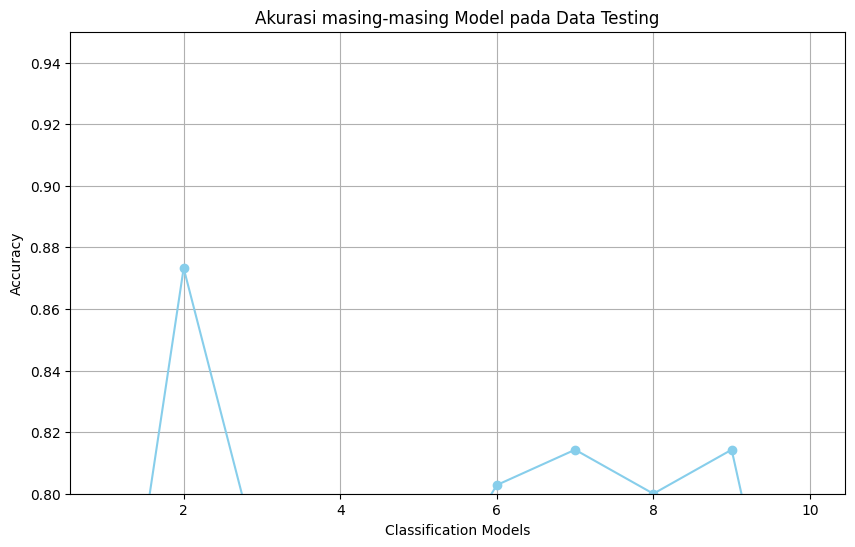

In [62]:
model_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_scores = accuracy_scores

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Akurasi masing-masing Model pada Data Testing')
plt.ylim(0.8, 0.95)
plt.grid(True)
plt.show()

###Confusion Matrix

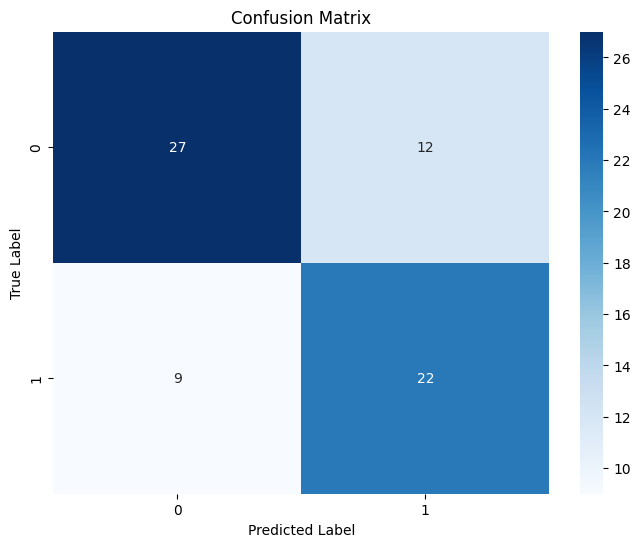

In [63]:
preprocessed_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(preprocessed_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##With next word negation

In [64]:
X = train_df['stopword_removed_nwn_processed']
y = train_df['sentiment_label']

kf = KFold(n_splits=10, shuffle=True)

accuracy_scores = []
best_accuracy = 0
best_model = None
best_vocabulary = None

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print(f"  Training data size: {len(X_train)}")
    print(f"  Validation data size: {len(X_test)}")

    tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(X_train)
    tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(X_test, vocabulary=vocabulary_train)

    nb_nwn_clf = MultinomialNaiveBayes()
    nb_nwn_clf.fit(tfidf_matrix_train, y_train, vocabulary_train)

    y_pred = nb_nwn_clf.predict(tfidf_matrix_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"  Fold accuracy: {accuracy}\n")

    # Update the best model if current fold's accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = nb_nwn_clf

# Train final model on the entire dataset
tfidf_matrix_full, vocabulary_full = vectorize_tfidf_from_processed_text(X)
final_model = MultinomialNaiveBayes()
final_model.fit(tfidf_matrix_full, y, vocabulary_full)

# Save the final model and vocabulary
joblib.dump(final_model, 'nb_nwn_best_classifier.pkl')
joblib.dump(vocabulary_full, 'nb_nwn_best_vectorizer.pkl')

# Calculate the mean accuracy over all folds
nb_nwn_kfold_mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", nb_nwn_kfold_mean_accuracy)
print("Best Fold Accuracy:", best_accuracy)
print(accuracy_scores)

Fold 1:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8309859154929577

Fold 2:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8169014084507042

Fold 3:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8732394366197183

Fold 4:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8309859154929577

Fold 5:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7605633802816901

Fold 6:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7887323943661971

Fold 7:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8

Fold 8:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8142857142857143

Fold 9:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8285714285714286

Fold 10:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.7714285714285715

Mean Accuracy: 0.811569416498994
B

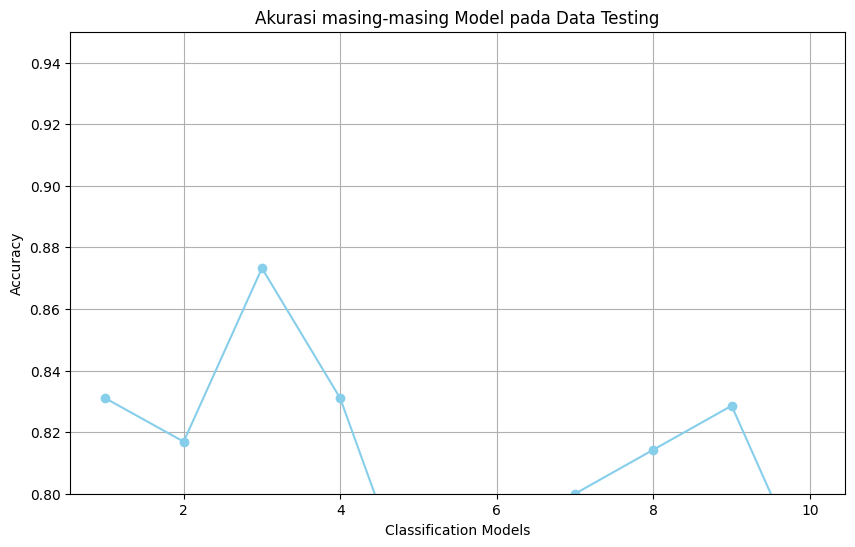

In [65]:
model_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_scores = accuracy_scores

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Akurasi masing-masing Model pada Data Testing')
plt.ylim(0.8, 0.95)
plt.grid(True)
plt.show()

###Confusion Matrix

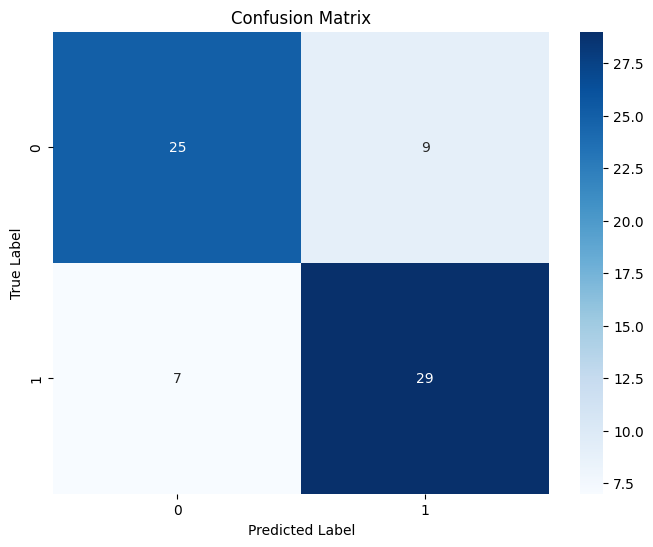

In [66]:
nwn_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(nwn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##With antonym

In [67]:
X = train_df['stopword_removed_antonym_processed']
y = train_df['sentiment_label']

kf = KFold(n_splits=10, shuffle=True)

accuracy_scores = []
best_accuracy = 0
best_model = None

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print(f"  Training data size: {len(X_train)}")
    print(f"  Validation data size: {len(X_test)}")

    tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(X_train)
    tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(X_test, vocabulary=vocabulary_train)

    nb_antonym_clf = MultinomialNaiveBayes()
    nb_antonym_clf.fit(tfidf_matrix_train, y_train, vocabulary_train)

    y_pred = nb_antonym_clf.predict(tfidf_matrix_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"  Fold accuracy: {accuracy}\n")

    # Update the best model if current fold's accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = nb_antonym_clf

# Train final model on the entire dataset
tfidf_matrix_full, vocabulary_full = vectorize_tfidf_from_processed_text(X)
final_model = MultinomialNaiveBayes()
final_model.fit(tfidf_matrix_full, y, vocabulary_full)

# Save the current best model and vocabulary
joblib.dump(final_model, 'nb_antonym_best_classifier.pkl')
joblib.dump(vocabulary_full, 'nb_antonym_best_vectorizer.pkl')

# Calculate the mean accuracy over all folds
nb_antonym_kfold_mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", nb_antonym_kfold_mean_accuracy)
print("Best Fold Accuracy:", best_accuracy)
print(accuracy_scores)

Fold 1:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8028169014084507

Fold 2:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.8450704225352113

Fold 3:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7887323943661971

Fold 4:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7746478873239436

Fold 5:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7464788732394366

Fold 6:
  Training data size: 635
  Validation data size: 71
  Fold accuracy: 0.7887323943661971

Fold 7:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8142857142857143

Fold 8:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8142857142857143

Fold 9:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.7857142857142857

Fold 10:
  Training data size: 636
  Validation data size: 70
  Fold accuracy: 0.8428571428571429

Mean Accuracy: 0.80

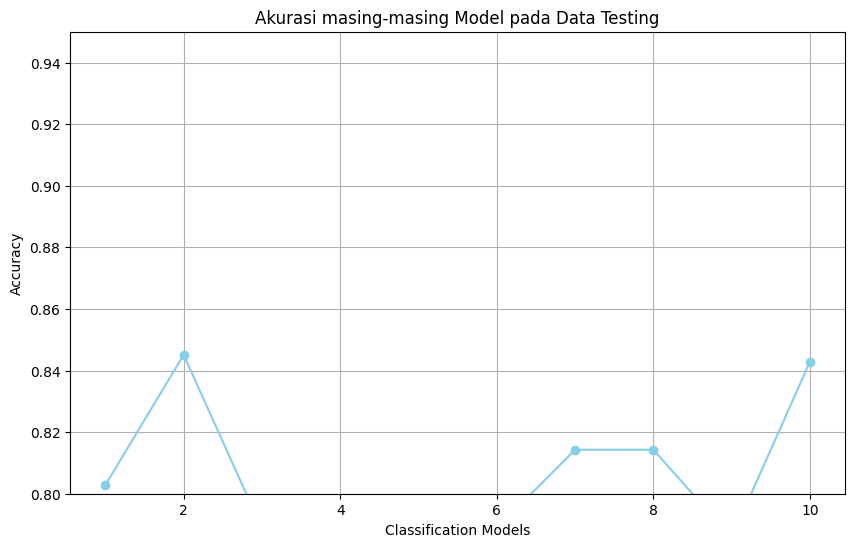

In [68]:
model_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_scores = accuracy_scores

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Akurasi masing-masing Model pada Data Testing')
plt.ylim(0.8, 0.95)
plt.grid(True)
plt.show()

###Confusion Matrix

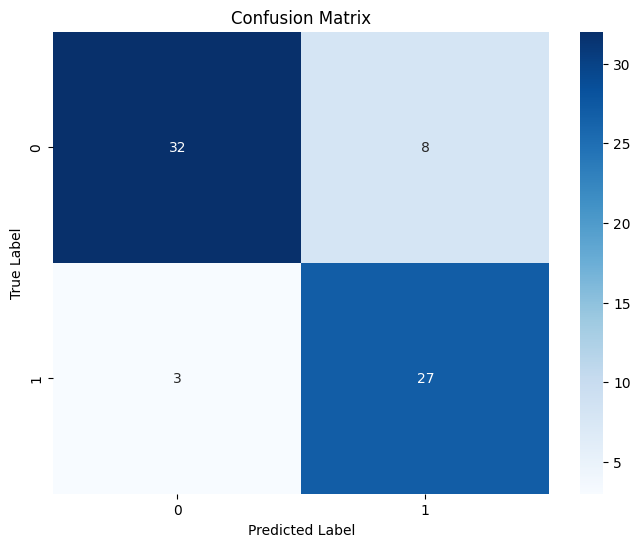

In [69]:
antonym_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(antonym_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Combine the accuracy

In [70]:
NB_kfold_mean_accuracies = {
    'processed_accuracy': [nb_preprocessed_kfold_mean_accuracy],
    'nwn_accuracy': [nb_nwn_kfold_mean_accuracy],
    'antonym_accuracy': [nb_antonym_kfold_mean_accuracy]
}

nb_kfold_mean_acc = pd.DataFrame(NB_kfold_mean_accuracies, index=['Naive Bayes'])
nb_kfold_mean_acc

,processed_accuracy,nwn_accuracy,antonym_accuracy
Naive Bayes,0.781871,0.811569,0.800362


#SVM

##Only preprocessed

In [71]:
X = train_df['stopword_removed_processed']
y = train_df['sentiment_label']

kf = KFold(n_splits=10, shuffle=True)

accuracy_scores = []
best_accuracy = 0
best_model = None

# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 2, 5, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print(f"  Training data size: {len(X_train)}")
    print(f"  Validation data size: {len(X_test)}")

    tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(X_train)
    tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(X_test, vocabulary=vocabulary_train)

    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1)
    grid_search.fit(tfidf_matrix_train, y_train)

    best_svm = grid_search.best_estimator_

    print("  Best parameters found by grid search:", grid_search.best_params_)

    y_pred = best_svm.predict(tfidf_matrix_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"  Fold accuracy: {accuracy}\n")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_svm
        best_parameter = grid_search.best_params_

tfidf_matrix_full, vocabulary_full = vectorize_tfidf_from_processed_text(X)
final_model = SVC(kernel=best_parameter['kernel'], C=best_parameter['C'], gamma=best_parameter['gamma'])
final_model.fit(tfidf_matrix_full, y)

joblib.dump(final_model, 'svm_preprocessed_best_classifier.pkl')
joblib.dump(vocabulary_full, 'svm_preprocessed_best_vectorizer.pkl')

svm_preprocessed_kfold_mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", svm_preprocessed_kfold_mean_accuracy)
print("Best Fold Accuracy:", best_accuracy)
print("Best parameters for the final model:", best_parameter)
print(accuracy_scores)

Fold 1:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.676056338028169

Fold 2:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.7605633802816901

Fold 3:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.7746478873239436

Fold 4:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.8169014084507042

Fold 5:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.8450704225352113

Fold 6:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, '

In [72]:
# # Assuming vectorize_tfidf_from_processed_text is defined elsewhere
# # and that train_df is your DataFrame containing the data

# X = train_df['stopword_removed_processed']
# y = train_df['sentiment_label']

# kf = KFold(n_splits=10, shuffle=True)

# accuracy_scores = []
# best_accuracy = 0
# best_model = None

# # Define the parameter grid for SVC
# param_grid = {
#     'C': [0.1, 1, 2, 5, 10],
#     'gamma': [1, 0.1, 0.01],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=10, verbose=1, n_jobs=-1)

# # Transform the entire dataset using TF-IDF
# tfidf_matrix, vocabulary = vectorize_tfidf_from_processed_text(X)

# # Fit the grid search to the TF-IDF transformed data
# grid_search.fit(tfidf_matrix, y)

# # Get the best estimator from the grid search
# best_model = grid_search.best_estimator_

# # Print the best parameters found by grid search
# print("Best parameters found by grid search:", grid_search.best_params_)

# mean_accuracies = grid_search.cv_results_['mean_test_score']
# print("Mean Accuracy for each fold:")
# for fold, mean_accuracy in enumerate(mean_accuracies, 1):
#     print(f"  Fold {fold}: {mean_accuracy}")

# # Save the best model and vocabulary
# joblib.dump(best_model, 'svm_preprocessed_best_classifier.pkl')
# joblib.dump(vocabulary, 'svm_preprocessed_best_vectorizer.pkl')

# # Calculate the mean accuracy from cross-validation results
# svm_preprocessed_kfold_mean_accuracy = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
# print("Mean Accuracy:", svm_preprocessed_kfold_mean_accuracy)

In [73]:
# from sklearn.pipeline import Pipeline

# X = train_df['stopword_removed_processed']
# y = train_df['sentiment_label']

# kf = KFold(n_splits=10, shuffle=True)  # 5-fold cross-validation

# accuracy_scores = []
# best_accuracy = 0
# best_model = None

# for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     print(f"Fold {fold}:")
#     print(f"  Training data size: {len(X_train)}")
#     print(f"  Validation data size: {len(X_test)}")

#     tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(X_train)
#     tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(X_test, vocabulary=vocabulary_train)

#     svm_preprocessed_classifier = SVC(kernel='rbf')
#     svm_preprocessed_classifier.fit(tfidf_matrix_train, y_train)

#     y_pred = svm_preprocessed_classifier.predict(tfidf_matrix_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)
#     print(f"  Fold accuracy: {accuracy}\n")

#     # Update the best model if current fold's accuracy is higher
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = svm_preprocessed_classifier

# # Train final model on the entire dataset
# tfidf_matrix_full, vocabulary_full = vectorize_tfidf_from_processed_text(X)
# final_model = SVC(kernel='rbf')
# final_model.fit(tfidf_matrix_full, y)

# # Save the final model and vocabulary
# joblib.dump(final_model, 'svm_preprocessed_best_classifier.pkl')
# joblib.dump(vocabulary_full, 'svm_preprocessed_best_vectorizer.pkl')

# # Calculate the mean accuracy over all folds
# svm_preprocessed_kfold_mean_accuracy = np.mean(accuracy_scores)
# print("Mean Accuracy:", svm_preprocessed_kfold_mean_accuracy)
# print("Best Fold Accuracy:", best_accuracy)

In [74]:
# model_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# accuracy_scores = accuracy_scores

# plt.figure(figsize=(10, 6))
# plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
# plt.xlabel('Classification Models')
# plt.ylabel('Accuracy')
# plt.title('Akurasi masing-masing Model pada Data Testing')
# plt.ylim(0.8, 0.95)
# plt.grid(True)
# plt.show()

###Confusion Matrix

In [75]:
# preprocessed_conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(preprocessed_conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=final_model.classes_,
#             yticklabels=final_model.classes_)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

##With next word negation

In [76]:
X = train_df['stopword_removed_nwn_processed']
y = train_df['sentiment_label']

kf = KFold(n_splits=10, shuffle=True)

accuracy_scores = []
best_accuracy = 0
best_model = None

# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 2, 5, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print(f"  Training data size: {len(X_train)}")
    print(f"  Validation data size: {len(X_test)}")

    tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(X_train)
    tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(X_test, vocabulary=vocabulary_train)

    # Perform grid search with cross-validation on the training data
    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1)
    grid_search.fit(tfidf_matrix_train, y_train)

    # Get the best estimator from the grid search
    best_svm = grid_search.best_estimator_

    # Print the best parameters found by grid search
    print("  Best parameters found by grid search:", grid_search.best_params_)

    y_pred = best_svm.predict(tfidf_matrix_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"  Fold accuracy: {accuracy}\n")

    # Update the best model if current fold's accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_svm
        best_parameter = grid_search.best_params_

# Train final model on the entire dataset with the best parameters found during any fold
tfidf_matrix_full, vocabulary_full = vectorize_tfidf_from_processed_text(X)
final_model = SVC(kernel=best_parameter['kernel'], C=best_parameter['C'], gamma=best_parameter['gamma'])
final_model.fit(tfidf_matrix_full, y)

# Save the final model and vocabulary
joblib.dump(final_model, 'svm_nwn_best_classifier.pkl')
joblib.dump(vocabulary_full, 'svm_nwn_best_vectorizer.pkl')

# Calculate the mean accuracy over all folds
svm_nwn_kfold_mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", svm_nwn_kfold_mean_accuracy)
print("Best Fold Accuracy:", best_accuracy)
print("Best parameters for the final model:", best_parameter)
print(accuracy_scores)

Fold 1:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
  Fold accuracy: 0.8309859154929577

Fold 2:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.7605633802816901

Fold 3:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.8028169014084507

Fold 4:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.7746478873239436

Fold 5:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.8309859154929577

Fold 6:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 1,

In [77]:
# X = train_df['stopword_removed_nwn_processed']
# y = train_df['sentiment_label']

# kf = KFold(n_splits=10, shuffle=True)

# accuracy_scores = []
# best_accuracy = 0
# best_model = None

# # Define the parameter grid for SVC
# param_grid = {
#     'C': [0.1, 1, 2, 5, 10],
#     'gamma': [1, 0.1, 0.01],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=10, verbose=1, n_jobs=-1)  # Using 10-fold cross-validation

# # Transform the entire dataset using TF-IDF
# tfidf_matrix, vocabulary = vectorize_tfidf_from_processed_text(X)

# # Fit the grid search to the TF-IDF transformed data
# grid_search.fit(tfidf_matrix, y)

# # Get the best estimator from the grid search
# best_model = grid_search.best_estimator_

# # Print the best parameters found by grid search
# print("Best parameters found by grid search:", grid_search.best_params_)

# mean_accuracies = grid_search.cv_results_['mean_test_score']
# print("Mean Accuracy for each fold:")
# for fold, mean_accuracy in enumerate(mean_accuracies, 1):
#     print(f"  Fold {fold}: {mean_accuracy}")

# # Save the best model and vocabulary
# joblib.dump(best_model, 'svm_nwn_best_classifier.pkl')
# joblib.dump(vocabulary, 'svm_nwn_best_vectorizer.pkl')

# # Calculate the mean accuracy from cross-validation results
# svm_nwn_kfold_mean_accuracy = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
# print("Mean Accuracy:", svm_nwn_kfold_mean_accuracy)

In [78]:
# model_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# accuracy_scores = accuracy_scores

# plt.figure(figsize=(10, 6))
# plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
# plt.xlabel('Classification Models')
# plt.ylabel('Accuracy')
# plt.title('Akurasi masing-masing Model pada Data Testing')
# plt.ylim(0.8, 0.95)
# plt.grid(True)
# plt.show()

###Confusion Matrix

In [79]:
# nwn_conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(nwn_conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=final_model.classes_,
#             yticklabels=final_model.classes_)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

##After swapped with antonym

In [80]:
X = train_df['stopword_removed_antonym_processed']
y = train_df['sentiment_label']

kf = KFold(n_splits=10, shuffle=True)

accuracy_scores = []
best_accuracy = 0
best_model = None

# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 2, 5, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print(f"  Training data size: {len(X_train)}")
    print(f"  Validation data size: {len(X_test)}")

    tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(X_train)
    tfidf_matrix_test, _ = vectorize_tfidf_from_processed_text(X_test, vocabulary=vocabulary_train)

    # Perform grid search with cross-validation on the training data
    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1)
    grid_search.fit(tfidf_matrix_train, y_train)

    # Get the best estimator from the grid search
    best_svm = grid_search.best_estimator_

    # Print the best parameters found by grid search
    print("  Best parameters found by grid search:", grid_search.best_params_)

    y_pred = best_svm.predict(tfidf_matrix_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"  Fold accuracy: {accuracy}\n")

    # Update the best model if current fold's accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_svm
        best_parameter = grid_search.best_params_

# Train final model on the entire dataset with the best parameters found during any fold
tfidf_matrix_full, vocabulary_full = vectorize_tfidf_from_processed_text(X)
final_model = SVC(kernel=best_parameter['kernel'], C=best_parameter['C'], gamma=best_parameter['gamma'])
final_model.fit(tfidf_matrix_full, y)

# Save the final model and vocabulary
joblib.dump(final_model, 'svm_antonym_best_classifier.pkl')
joblib.dump(vocabulary_full, 'svm_antonym_best_vectorizer.pkl')

# Calculate the mean accuracy over all folds
svm_antonym_kfold_mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", svm_antonym_kfold_mean_accuracy)
print("Best Fold Accuracy:", best_accuracy)
print("Best parameters for the final model:", best_parameter)
print(accuracy_scores)

Fold 1:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.8169014084507042

Fold 2:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Fold accuracy: 0.7183098591549296

Fold 3:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.7887323943661971

Fold 4:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.7887323943661971

Fold 5:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
  Fold accuracy: 0.8169014084507042

Fold 6:
  Training data size: 635
  Validation data size: 71
  Best parameters found by grid search: {'C': 1

In [81]:
# X = train_df['stopword_removed_antonym_processed']
# y = train_df['sentiment_label']

# kf = KFold(n_splits=10, shuffle=True)

# accuracy_scores = []
# best_accuracy = 0
# best_model = None

# # Define the parameter grid for SVC
# param_grid = {
#     'C': [0.1, 1, 10, 20],
#     'gamma': [1, 0.1, 0.01],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=10, verbose=1, n_jobs=-1)  # Using 10-fold cross-validation

# # Transform the entire dataset using TF-IDF
# tfidf_matrix, vocabulary = vectorize_tfidf_from_processed_text(X)

# # Fit the grid search to the TF-IDF transformed data
# grid_search.fit(tfidf_matrix, y)

# # Get the best estimator from the grid search
# best_model = grid_search.best_estimator_

# # Print the best parameters found by grid search
# print("Best parameters found by grid search:", grid_search.best_params_)

# mean_accuracies = grid_search.cv_results_['mean_test_score']
# print("Mean Accuracy for each fold:")
# for fold, mean_accuracy in enumerate(mean_accuracies, 1):
#     print(f"  Fold {fold}: {mean_accuracy}")

# # Save the best model and vocabulary
# joblib.dump(best_model, 'svm_antonym_best_classifier.pkl')
# joblib.dump(vocabulary, 'svm_antonym_best_vectorizer.pkl')

# # Calculate the mean accuracy from cross-validation results
# svm_antonym_kfold_mean_accuracy = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
# print("Mean Accuracy:", svm_antonym_kfold_mean_accuracy)

In [82]:
# model_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# accuracy_scores = accuracy_scores

# plt.figure(figsize=(10, 6))
# plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
# plt.xlabel('Classification Models')
# plt.ylabel('Accuracy')
# plt.title('Akurasi masing-masing Model pada Data Testing')
# plt.ylim(0.8, 0.95)
# plt.grid(True)
# plt.show()

###Confusion Matrix

In [83]:
# antonym_conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(antonym_conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=final_model.classes_,
#             yticklabels=final_model.classes_)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

##Combine the accuracy

In [84]:
svm_kfold_mean_data = {
    'processed_accuracy': [svm_preprocessed_kfold_mean_accuracy],
    'nwn_accuracy': [svm_nwn_kfold_mean_accuracy],
    'antonym_accuracy': [svm_antonym_kfold_mean_accuracy]
}

model_kfold_mean_acc = pd.concat([nb_kfold_mean_acc, pd.DataFrame(svm_kfold_mean_data, index=['SVM'])])
model_kfold_mean_acc

,processed_accuracy,nwn_accuracy,antonym_accuracy
Naive Bayes,0.781871,0.811569,0.800362
SVM,0.781911,0.798773,0.800362


In [85]:
train_df.to_csv('train_df_processed.csv')

#Exploration

##Getting balanced dataset that has negation words in each row

In [86]:
filtered_df = train_df[(train_df['difference_nwn'] != '') & (train_df['difference'] != '')]
# Count the number of rows for each class in 'sentiment_label'
class_counts = filtered_df['sentiment_label'].value_counts()

# Display the counts
print(class_counts)

sentiment_label
0    289
1    272
Name: count, dtype: int64


In [87]:
filtered_df = train_df[(train_df['difference_nwn'] != '')]
# Count the number of rows for each class in 'sentiment_label'
class_counts = filtered_df ['sentiment_label'].value_counts()

# Display the counts
print(class_counts)

sentiment_label
0    322
1    277
Name: count, dtype: int64


In [88]:
#pisahkan review positif dan negatif
positive_rows = filtered_df[filtered_df['sentiment_label'] == 1]
negative_rows = filtered_df[filtered_df['sentiment_label'] == 0]

#random sampling baris berlabel positive sebanyak jumlah review negatif (905 baris negatif)
if (len(positive_rows) > len(negative_rows)):
    positive_sampled = positive_rows.sample(n=len(negative_rows))
else:
    negative_sampled = negative_rows.sample(n=len(positive_rows))

# #gabungkan ke df baru
balanced_df = pd.concat([negative_sampled, positive_rows], ignore_index=True)
balanced_df

,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonim_text,difference_nwn,difference,stopword_removed_processed,stopword_removed_nwn_processed,stopword_removed_antonym_processed
0,Sesuai detail pesanan seharusnya barang sudah ...,1,0,sesuai detail pesanan seharusnya barang sudah ...,sesuai detail pesanan seharusnya barang sudah ...,sesuai detail pesanan seharusnya barang sudah ...,sesuai detail pesanan seharusnya barang sudah ...,sesuai detail pesanan seharusnya barang sudah ...,sesuai detail pesan harus barang sudah saya te...,sesuai detail pesan harus barang sudah saya te...,sesuai detail pesan harus barang sudah saya te...,tidak pernah tidak tidak tidak profesional,pernah profesional,sesuai detail pesan barang terima maksimal tan...,sesuai detail pesan barang terima maksimal tan...,sesuai detail pesan barang terima maksimal tan...
1,Kualitasnya tidak sesuai dg merk nya,1,0,kualitasnya tidak sesuai dg merk nya,kualitasnya tidak sesuai dengan merk nya,kualitasnya tidak sesuai dengan merk nya,kualitasnya tidak sesuai dengan merknya,kualitasnya tidak sesuai dengan merknya,kualitas tidak sesuai dengan merknya,kualitas tidak_sesuai dengan merknya,kualitas salah dengan merknya,tidak sesuai,tidak sesuai,kualitas sesuai merknya,kualitas tidak_sesuai merknya,kualitas salah merknya
2,"Barang pesanan belum saya terima, kenapa sudah...",1,0,barang pesanan belum saya terima kenapa sudah...,barang pesanan belum saya terima kenapa sudah ...,barang pesanan belum saya terima kenapa sudah ...,barang pesanan belum saya terima kenapa sudah ...,barang pesanan belum saya terima kenapa sudah ...,barang pesan belum saya terima kenapa sudah ad...,barang pesan belum_saya terima kenapa sudah ad...,"barang pesan kamu, engkau terima kenapa sudah ...",belum,belum,barang pesan terima email menerima suruh tulis...,barang pesan belum_saya terima email menerima ...,"barang pesan kamu, engkau terima email menerim..."
3,kecewa banget nihhh kak....masak tv baru dipak...,1,0,kecewa banget nihhh kak masak tv baru dipakek ...,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...,tidak muncul,tidak muncul,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...,kecewa sekali nih kak masak tv baru dipakek ha...
4,Kabelnya putus ga konek.,1,0,kabelnya putus ga konek,kabelnya putus tidak konek,kabelnya putus tidak kopek,kabelnya putus tidak kopek,kabelnya putus tidak kopek,kabel putus tidak kopek,kabel putus tidak_kopek,kabel putus tidak kopek,tidak kopek,,kabel putus kopek,kabel putus tidak_kopek,kabel putus kopek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,brang bagus dan tidak cacat..thx lazada,5,1,brang bagus dan tidak cacat thx lazada,brang bagus dan tidak cacat terima kasih lazada,bang bagus dan tidak cacat terima kasih lazada,bang bagus dan tidak cacat terima kasih lazada,bang bagus dan tidak cacat terima kasih lazada,bang bagus dan tidak cacat terima kasih lazada,bang bagus dan tidak_cacat terima kasih lazada,"bang bagus dan baik, normal terima kasih lazada",tidak cacat,tidak cacat,bang bagus cacat terima kasih lazada,bang bagus tidak_cacat terima kasih lazada,"bang bagus baik, normal terima kasih lazada"
550,"Barang baik,hanya saja pengirim pakai Pos Indo...",5,1,barang baik hanya saja pengirim pakai pos ind...,barang baik hanya saja pengirim pakai pos indo...,barang baik hanya saja pengirim pakai pos indo...,barang baik hanya saja pengirim pakai pos indo...,barang baik hanya saja pengirim pakai pos indo...,barang baik hanya saja pengirim pakai pos indo...,barang baik hanya saja pengirim pakai pos indo...,barang baik hany

In [89]:
class_counts = balanced_df['sentiment_label'].value_counts()

# Display the counts
print(class_counts)

sentiment_label
0    277
1    277
Name: count, dtype: int64


In [90]:
balanced_df.to_csv('balanced_df_with_negation.csv')

In [91]:
# df1 = pd.read_csv('/content/balanced_df_with_negation.csv')
# df2 = pd.read_csv('/content/balanced_df_with_negation_lazada.csv')

# df1_selected = df1[['text', 'rating', 'sentiment_label']]
# df2_selected = df2[['text', 'rating', 'sentiment_label']]

# combined_df = pd.concat([df1_selected, df2_selected], ignore_index=True)

# # Display the combined DataFrame
# class_counts = combined_df['sentiment_label'].value_counts()

# combined_df.to_csv('combined_df.csv')

# # Display the counts
# print(class_counts)
# combined_df

#Pipeline

1. Preprocessed
2. Apply typo correction
3. Combine "nya" with the previous word
4. Combine "di" with the next word
5. Apply stemming
6. Apply next word negation
7. Apply antonym swapping
8. Apply stopword removal on preprocessed only
9. Apply stopword removal on next word negation
10. Apply stopword removal on antonym swapping

In [92]:
import joblib

def preprocess_pipeline(df, text_column):
    # Preprocess
    df['preprocessed'] = df[text_column].apply(preprocess_text)

    # Apply typo correction
    df['typo_corected'] = df['preprocessed'].apply(correct_typo)

    # Apply cleaning multiple letter typo
    df['typo_corrected'] = df['typo_corected'].apply(lambda x: correct_words_in_sentence(x, correct_words))

    # Combine "nya" with previous word
    df['combined_nya'] = df['typo_corrected'].apply(combine_nya_with_previous)

    # Combine "di" with previous word
    df['combined_di'] = df['combined_nya'].apply(combine_di_with_next)

    # Apply typo correction
    df['stemmed'] = df['combined_di'].apply(process_sentence)

    # Apply next word negation
    df['after_nwn_text'] = df['stemmed'].apply(next_word_negation)

    # Apply antonym swapping
    df['after_antonym_text'] = df['stemmed'].apply(swap_antonyms)

    # Remove stopwords on preprocessed only
    df["stopword_removed_processed"] = df["stemmed"].apply(
        lambda text: " ".join([word for word in text.split() if word not in stopwords])
    )

    # Remove stopwords on next word negation
    df["stopword_removed_nwn_processed"] = df["after_nwn_text"].apply(
        lambda text: " ".join([word for word in text.split() if word not in stopwords])
    )

    # Remove stopwords on antonym swapping
    df["stopword_removed_antonym_processed"] = df["after_antonym_text"].apply(
        lambda text: " ".join([word for word in text.split() if word not in stopwords])
    )

    return df

#Testing

In [93]:
test3 = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/20191002-reviews.csv')
test1 = test3.loc[:, ['reviewContent', 'rating']].rename(columns={'reviewContent': 'text'}).dropna()
test1['sentiment_label'] = test1['rating'].apply(map_rating_to_label)

#identify rows in test1 that are not in balanced_df
distinct_df1 = test1[~test1['text'].isin(balanced_df['text'])]

#sample 5000 distinct rows with sentiment_label = 1
sampled_1 = distinct_df1[distinct_df1['sentiment_label'] == 1].sample(5000, replace=True)
#sample 5000 distinct rows with sentiment_label = 0
sampled_0 = distinct_df1[distinct_df1['sentiment_label'] == 0].sample(5000, replace=True)

#combine the sampled dataframes
test2 = pd.concat([sampled_1, sampled_0],  ignore_index=True)
test2 = test2.drop_duplicates(subset='text')

label_distribution = test2['sentiment_label'].value_counts()
print(label_distribution)

processed_df = preprocess_pipeline(test2, test2.columns[0])
processed_df

sentiment_label
1    4347
0    2415
Name: count, dtype: int64


,text,rating,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonym_text,stopword_removed_processed,stopword_removed_nwn_processed,stopword_removed_antonym_processed
0,bagus relpict... puas 😁,5,1,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas,bagus relpict puas
1,sejauh ini masih ok,5,1,sejauh ini masih ok,sejauh ini masih ok,sejauh ini masih o,sejauh ini masih o,sejauh ini masih o,jauh ini masih o,jauh ini masih o,jauh ini masih o,jauh o,jauh o,jauh o
2,mantep super cepat langsung sampai pesan hari ...,5,1,mantep super cepat langsung sampai pesan hari ...,mantap super cepat langsung sampai pesan hari ...,mantap super cepat langsung sampai pesan hari ...,mantap super cepat langsung sampai pesan hari ...,mantap super cepat langsung sampai pesan hari ...,mantap super cepat langsung sampai pesan hari ...,mantap super cepat langsung sampai pesan hari ...,mantap super cepat langsung sampai pesan hari ...,mantap super cepat langsung pesan hari besok,mantap super cepat langsung pesan hari besok,mantap super cepat langsung pesan hari besok
3,recomended.,5,1,recomended,recomended,recomended,recomended,recomended,recomended,recomended,recomended,recomended,recomended,recomended
4,"Sesuai deskripsi, pengiriman 2 hari lebih cepa...",5,1,sesuai deskripsi pengiriman hari lebih cepat ...,sesuai deskripsi pengiriman hari lebih cepat d...,sesuai deskripsi pengiriman hari lebih cepat d...,sesuai deskripsi pengiriman hari lebih cepat d...,sesuai deskripsi pengiriman hari lebih cepat d...,sesuai deskripsi pengiriman hari lebih cepat d...,sesuai deskripsi pengiriman hari lebih cepat d...,sesuai deskripsi pengiriman hari lebih cepat d...,sesuai deskripsi pengiriman hari lebih cepat e...,sesuai deskripsi pengiriman hari lebih cepat e...,sesuai deskripsi pengiriman hari lebih cepat e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,sudah coba malah gak bisa nyalak 😔,1,0,sudah coba malah gak bisa nyalak,sudah coba malah tidak bisa nyalak,sudah coba malah tidak bisa nyala,sudah coba malah tidak bisa nyala,sudah coba malah tidak bisa nyala,sudah coba malah tidak bisa nyala,sudah coba malah tidak_bisa nyala,sudah coba malah tidak bisa nyala,coba malah nyala,coba malah tidak_bisa nyala,coba malah nyala
9971,"Satu bintang dulu, ntar kalo barang nyampe dan...",1,0,satu bintang dulu ntar kalo barang nyampe dan...,satu bintang dulu entar kalau barang sampai da...,satu bintang dulu entar kalau barang sampai da...,satu bintang dulu entar kalau barang sampai da...,satu bintang dulu entar kalau barang sampai da...,satu bintang dulu entar kalau barang sampai da...,satu bintang dulu entar kalau barang sampai da...,satu bintang dulu entar kalau barang sampai da...,satu bintang dulu entar kalau barang kondisi b...,satu bintang dulu entar kalau barang kondisi b...,satu bintang dulu entar kalau barang kondisi b...
9979,Isinya cuma 14gb.. Hadeh..,1,0,isinya cuma gb hadeh,isinya hanya gb hadeh,sisinya hanya g adeh,sisinya hanya g adeh,sisinya hanya g adeh,sisi hanya g adeh,sisi hanya g adeh,sisi hanya g adeh,sisi g adeh,sisi g adeh,sisi g adeh
9981,tv tidak berfungsi..saya coba keservis centre ...,1,0,tv tidak berfungsi saya coba keservis centre k...,tv tidak berfungsi saya coba keservis centre k...,tv tidak berfungsi saya coba keservis entre kl...,tv tidak berfungsi saya coba keservis entre kl...,tv tidak berfungsi saya coba keservis entre kl...,tv tidak fungsi saya coba servis entre klaim g...,tv tidak_fungsi saya coba servis entre klaim g...,tv tidak fungsi saya coba servis entre klaim g...,tv fungsi coba servis entre klaim garansi alam...,tv tidak_fungsi coba servis entre klaim garans...,tv fungsi coba servis entre klaim garansi alam...


In [94]:
test = pd.read_csv('/content/drive/MyDrive/Tugas Akhire/Dataset/test_labelled.csv')
processed_df = preprocess_pipeline(test, test.columns[0])
processed_df

,content,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonym_text,stopword_removed_processed,stopword_removed_nwn_processed,stopword_removed_antonym_processed
0,"mantaaaap, barang sudah diterima",1,mantaaaap barang sudah diterima,mantaaaap barang sudah diterima,mantap barang sudah diterima,mantap barang sudah diterima,mantap barang sudah diterima,mantap barang sudah terima,mantap barang sudah terima,mantap barang sudah terima,mantap barang terima,mantap barang terima,mantap barang terima
1,"Udah sampe,udh dicoba, lancar jaya gan\r\n\r\n...",1,udah sampe udh dicoba lancar jaya gan thx b...,sudah sampai sudah dicoba lancar jaya gan teri...,sudah sampai sudah dicoba lancar jaya ga terim...,sudah sampai sudah dicoba lancar jaya ga terim...,sudah sampai sudah dicoba lancar jaya ga terim...,sudah sampai sudah coba lancar jaya ga terima ...,sudah sampai sudah coba lancar jaya ga terima ...,sudah sampai sudah coba lancar jaya ga terima ...,coba lancar jaya ga terima kasih hari minggu s...,coba lancar jaya ga terima kasih hari minggu s...,coba lancar jaya ga terima kasih hari minggu s...
2,"Barang bagus,respon penjual cepat. Good seller",1,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter
3,Cukup baik. Sesuai harga,1,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga
4,trimakasih brg sdh diterima dgn baik,1,trimakasih brg sdh diterima dgn baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah terima dengan baik,trimakasih barang sudah terima dengan baik,trimakasih barang sudah terima dengan baik,trimakasih barang terima baik,trimakasih barang terima baik,trimakasih barang terima baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Batere nya cpt habis..????,0,batere nya cpt habis,batere nya cepat habis,batere nya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis
166,"Ternyata bahannya gk bs melar,,jd wlwpun bebas...",0,ternyata bahannya gk bs melar jd wlwpun beba...,ternyata bahannya tidak bisa melar jadi walaup...,ternyata bahannya tidak bisa melar jadi walaup...,ternyata bahannya tidak bisa melar jadi walaup...,ternyata bahannya tidak bisa melar jadi walaup...,nyata bahan tidak bisa melar jadi walaupun beb...,nyata bahan tidak_bisa melar jadi walaupun beb...,nyata bahan tidak bisa melar jadi walaupun beb...,nyata bahan melar jadi walaupun bebas sige tet...,nyata bahan tidak_bisa melar jadi walaupun beb...,nyata bahan melar jadi walaupun bebas sige tet...
167,Agak beda dengan gambar produk yg dipajang (me...,0,agak beda dengan gambar produk yg dipajang mer...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang pajang mer...,agak beda dengan gambar produk yang pajang mer...,agak beda dengan gambar produk yang pajang mer...,beda gambar produk pajang merk am bungkuk gamb...,beda gambar produk pajang merk am bungkuk gam

In [95]:
# test = pd.read_csv('/content/test_labelled.csv')
# processed_df = preprocess_pipeline(test, test.columns[0])
# processed_df

In [96]:
y_test = processed_df['sentiment_label']
y_test

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: sentiment_label, Length: 170, dtype: int64

##Testing Accuracy

In [97]:
model_vectorizer_data = {
    'nb_preprocessed': ('nb_preprocessed_best_classifier.pkl', 'nb_preprocessed_best_vectorizer.pkl', 'stopword_removed_processed'),
    'nb_nwn': ('nb_nwn_best_classifier.pkl', 'nb_nwn_best_vectorizer.pkl', 'stopword_removed_nwn_processed'),
    'nb_antonym': ('nb_antonym_best_classifier.pkl', 'nb_antonym_best_vectorizer.pkl', 'stopword_removed_antonym_processed'),
    'svm_preprocessed': ('svm_preprocessed_best_classifier.pkl', 'svm_preprocessed_best_vectorizer.pkl', 'stopword_removed_processed'),
    'svm_nwn': ('svm_nwn_best_classifier.pkl', 'svm_nwn_best_vectorizer.pkl', 'stopword_removed_nwn_processed'),
    'svm_antonym': ('svm_antonym_best_classifier.pkl', 'svm_antonym_best_vectorizer.pkl', 'stopword_removed_antonym_processed')
}

accuracies = {}
for model_name, (model_file, vectorizer_file, text_column) in model_vectorizer_data.items():
    model = joblib.load(model_file)
    vectorizer = joblib.load(vectorizer_file)

    X_test_vec, _ = vectorize_tfidf_from_processed_text(processed_df[text_column], vocabulary=vectorizer)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)

    accuracies[model_name] = accuracy

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])


print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")
accuracy_df

The best model is svm_antonym with an accuracy of 0.9118


,Model,Accuracy
0,nb_preprocessed,0.852941
1,nb_nwn,0.876471
2,nb_antonym,0.888235
3,svm_preprocessed,0.876471
4,svm_nwn,0.870588
5,svm_antonym,0.911765


In [98]:
# import joblib
# import numpy as np
# import pandas as pd
# from sklearn.metrics import accuracy_score
# from tensorflow.keras.models import load_model

# model_vectorizer_data = {
#     'nb_preprocessed': ('nb_preprocessed_best_classifier.pkl', 'nb_preprocessed_best_vectorizer.pkl', 'stopword_removed_processed'),
#     'nb_nwn': ('nb_nwn_best_classifier.pkl', 'nb_nwn_best_vectorizer.pkl', 'stopword_removed_nwn_processed'),
#     'nb_antonym': ('nb_antonym_best_classifier.pkl', 'nb_antonym_best_vectorizer.pkl', 'stopword_removed_antonym_processed'),
#     'svm_preprocessed': ('svm_preprocessed_best_classifier.pkl', 'svm_preprocessed_best_vectorizer.pkl', 'stopword_removed_processed'),
#     'svm_nwn': ('svm_nwn_best_classifier.pkl', 'svm_nwn_best_vectorizer.pkl', 'stopword_removed_nwn_processed'),
#     'svm_antonym': ('svm_antonym_best_classifier.pkl', 'svm_antonym_best_vectorizer.pkl', 'stopword_removed_antonym_processed'),
#     'tf_antonym': ('final_model.h5', 'final_vectorizer.pkl', 'stopword_removed_antonym_processed')
# }

# accuracies = {}
# for model_name, (model_file, vectorizer_file, text_column) in model_vectorizer_data.items():
#     vectorizer = joblib.load(vectorizer_file)

#     if 'tf' in model_name:
#         X_test_vec = vectorizer.transform(processed_df[text_column]).toarray()
#         model = load_model(model_file)
#         y_pred = (model.predict(X_test_vec) > 0.5).astype("int32").flatten()
#     else:
#         X_test_vec, _ = vectorize_tfidf_from_processed_text(processed_df[text_column], vocabulary=vectorizer)
#         model = joblib.load(model_file)
#         y_pred = model.predict(X_test_vec)

#     print(f"Model: {model_name} - y_test length: {len(y_test)}, y_pred length: {len(y_pred)}")
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies[model_name] = accuracy

# best_model = max(accuracies, key=accuracies.get)
# best_accuracy = accuracies[best_model]

# accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")
# accuracy_df


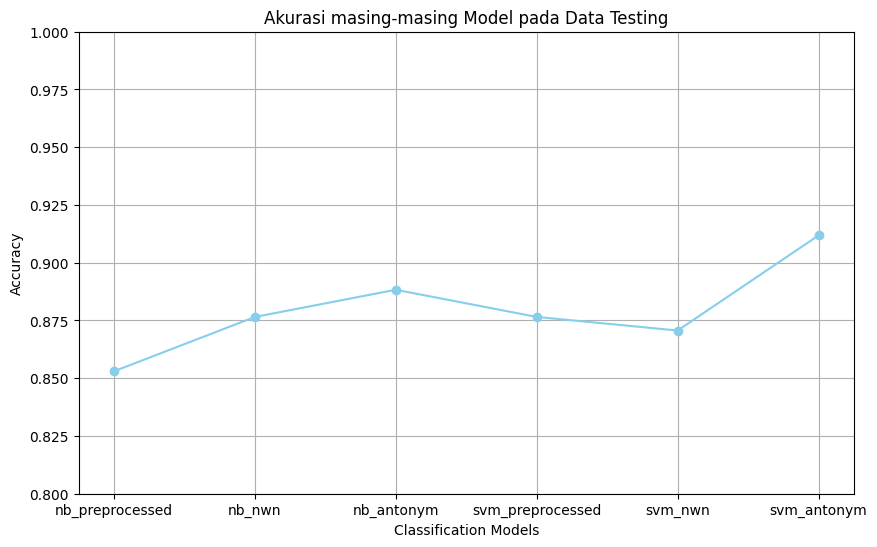

In [99]:
model_names = accuracy_df['Model']
accuracy_scores = accuracy_df['Accuracy']

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Akurasi masing-masing Model pada Data Testing')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

In [100]:
processed_df

,content,sentiment_label,preprocessed,typo_corected,typo_corrected,combined_nya,combined_di,stemmed,after_nwn_text,after_antonym_text,stopword_removed_processed,stopword_removed_nwn_processed,stopword_removed_antonym_processed
0,"mantaaaap, barang sudah diterima",1,mantaaaap barang sudah diterima,mantaaaap barang sudah diterima,mantap barang sudah diterima,mantap barang sudah diterima,mantap barang sudah diterima,mantap barang sudah terima,mantap barang sudah terima,mantap barang sudah terima,mantap barang terima,mantap barang terima,mantap barang terima
1,"Udah sampe,udh dicoba, lancar jaya gan\r\n\r\n...",1,udah sampe udh dicoba lancar jaya gan thx b...,sudah sampai sudah dicoba lancar jaya gan teri...,sudah sampai sudah dicoba lancar jaya ga terim...,sudah sampai sudah dicoba lancar jaya ga terim...,sudah sampai sudah dicoba lancar jaya ga terim...,sudah sampai sudah coba lancar jaya ga terima ...,sudah sampai sudah coba lancar jaya ga terima ...,sudah sampai sudah coba lancar jaya ga terima ...,coba lancar jaya ga terima kasih hari minggu s...,coba lancar jaya ga terima kasih hari minggu s...,coba lancar jaya ga terima kasih hari minggu s...
2,"Barang bagus,respon penjual cepat. Good seller",1,barang bagus respon penjual cepat good seller,barang bagus respon penjual cepat good seller,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter,barang bagus respons penjual cepat goods selter
3,Cukup baik. Sesuai harga,1,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga,cukup baik sesuai harga
4,trimakasih brg sdh diterima dgn baik,1,trimakasih brg sdh diterima dgn baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah diterima dengan baik,trimakasih barang sudah terima dengan baik,trimakasih barang sudah terima dengan baik,trimakasih barang sudah terima dengan baik,trimakasih barang terima baik,trimakasih barang terima baik,trimakasih barang terima baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Batere nya cpt habis..????,0,batere nya cpt habis,batere nya cepat habis,batere nya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis,baterenya cepat habis
166,"Ternyata bahannya gk bs melar,,jd wlwpun bebas...",0,ternyata bahannya gk bs melar jd wlwpun beba...,ternyata bahannya tidak bisa melar jadi walaup...,ternyata bahannya tidak bisa melar jadi walaup...,ternyata bahannya tidak bisa melar jadi walaup...,ternyata bahannya tidak bisa melar jadi walaup...,nyata bahan tidak bisa melar jadi walaupun beb...,nyata bahan tidak_bisa melar jadi walaupun beb...,nyata bahan tidak bisa melar jadi walaupun beb...,nyata bahan melar jadi walaupun bebas sige tet...,nyata bahan tidak_bisa melar jadi walaupun beb...,nyata bahan melar jadi walaupun bebas sige tet...
167,Agak beda dengan gambar produk yg dipajang (me...,0,agak beda dengan gambar produk yg dipajang mer...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang dipajang m...,agak beda dengan gambar produk yang pajang mer...,agak beda dengan gambar produk yang pajang mer...,agak beda dengan gambar produk yang pajang mer...,beda gambar produk pajang merk am bungkuk gamb...,beda gambar produk pajang merk am bungkuk gam

In [101]:
# List all installed packages and their versions
!pip list

# Save the list of installed packages and their versions to requirements.txt
!pip freeze > requirements.txt

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

#Prep for Ujian

##Vocab Size of each dataset

###Next Word Negation

In [102]:
X_nwn = train_df['stopword_removed_nwn_processed']
X_train, X_test = X_nwn.tolist(), X_nwn.tolist()

tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(pd.Series(X_train))

# print(X_train[100])
print(tfidf_matrix_train[100])
print(len(vocabulary_train), vocabulary_train)
# print(tfidf_matrix_test)

  (0, 113)	0.3564375580730298
  (0, 460)	0.5199791605293022
  (0, 668)	0.43333576295930903
  (0, 1446)	0.7718420380970853
  (0, 1614)	0.8584854356670785
  (0, 1762)	0.8584854356670785
  (0, 1829)	0.3989478516786939
  (0, 2393)	0.8584854356670785
2401 ['ab', 'abal', 'abang', 'abu', 'acc', 'aceh', 'acu', 'adapter', 'adaptor', 'adu', 'aduh', 'aga', 'agan', 'agung', 'agustus', 'ah', 'aha', 'air', 'ajak', 'akal', 'akalakalan', 'akhir', 'akses', 'aktif', 'aktip', 'aktivasi', 'aku', 'akurasi', 'akurat', 'al', 'alam', 'alamat', 'alami', 'alas', 'alasannya', 'alat', 'alhamdulillah', 'alhasil', 'alias', 'allah', 'alo', 'always', 'am', 'aman', 'amanah', 'amazing', 'ambil', 'amin', 'amplop', 'ampservice', 'ampun', 'an', 'anak', 'analog', 'and', 'andai', 'android', 'androidnya', 'aneh', 'aneka', 'anggap', 'angkat', 'anjing', 'anksh', 'antar', 'ante', 'antena', 'anti', 'antivirus', 'anyway', 'apa', 'apa-apa', 'apabila', 'apapun', 'apes', 'aplikasi', 'april', 'arab', 'arah', 'are', 'area', 'aren', 'a

###Antonym

In [103]:
X_antonym = train_df['stopword_removed_antonym_processed']
X_train, X_test = X_antonym.tolist(), X_antonym.tolist()

tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(pd.Series(X_train))

# print(X_train[100])
print(tfidf_matrix_train[100])
print(len(vocabulary_train), vocabulary_train)
# print(tfidf_matrix_test)

  (0, 118)	0.3564375580730298
  (0, 417)	0.5199791605293022
  (0, 640)	0.43333576295930903
  (0, 1425)	0.7718420380970853
  (0, 1598)	0.8584854356670785
  (0, 1749)	0.8584854356670785
  (0, 1822)	0.3989478516786939
  (0, 2192)	0.8584854356670785
2201 ['ab', 'abal', 'abang', 'abnormal,', 'abu', 'acc', 'aceh', 'acu', 'acuh', 'adapter', 'adaptor', 'adu', 'aduh', 'aga', 'agan', 'agung', 'agustus', 'ah', 'aha', 'air', 'ajak', 'akal', 'akalakalan', 'akhir', 'akhir,', 'akses', 'aktif', 'aktip', 'aktivasi', 'aku', 'akurasi', 'akurat', 'al', 'alam', 'alamat', 'alami', 'alas', 'alasannya', 'alat', 'alhamdulillah', 'alhasil', 'alias', 'allah', 'alo', 'always', 'am', 'aman', 'amanah', 'amatir', 'amazing', 'ambil', 'amin', 'amplop', 'ampservice', 'ampun', 'an', 'anak', 'analog', 'and', 'andai', 'android', 'androidnya', 'aneh', 'aneka', 'anggap', 'angkat', 'anjing', 'anksh', 'antar', 'ante', 'antena', 'anti', 'antivirus', 'anyway', 'apa', 'apa-apa', 'apabila', 'apapun', 'apes', 'aplikasi', 'april', 

###Prep

In [104]:
X_prep = train_df['stopword_removed_processed']
X_train, X_test = X_prep.tolist(), X_prep.tolist()

tfidf_matrix_train, vocabulary_train = vectorize_tfidf_from_processed_text(pd.Series(X_train))

# print(X_train[100])
print(tfidf_matrix_train[100])
print(len(vocabulary_train), vocabulary_train)
# print(tfidf_matrix_test)

  (0, 113)	0.33383519220935237
  (0, 400)	0.5199791605293022
  (0, 617)	0.43333576295930903
  (0, 1378)	0.7718420380970853
  (0, 1553)	0.8584854356670785
  (0, 1703)	0.8584854356670785
  (0, 1773)	0.2803638340065445
  (0, 2135)	0.8584854356670785
2144 ['ab', 'abal', 'abang', 'abu', 'acc', 'aceh', 'acu', 'adapter', 'adaptor', 'adu', 'aduh', 'aga', 'agan', 'agung', 'agustus', 'ah', 'aha', 'air', 'ajak', 'akal', 'akalakalan', 'akhir', 'akses', 'aktif', 'aktip', 'aktivasi', 'aku', 'akurasi', 'akurat', 'al', 'alam', 'alamat', 'alami', 'alas', 'alasannya', 'alat', 'alhamdulillah', 'alhasil', 'alias', 'allah', 'alo', 'always', 'am', 'aman', 'amanah', 'amazing', 'ambil', 'amin', 'amplop', 'ampservice', 'ampun', 'an', 'anak', 'analog', 'and', 'andai', 'android', 'androidnya', 'aneh', 'aneka', 'anggap', 'angkat', 'anjing', 'anksh', 'antar', 'ante', 'antena', 'anti', 'antivirus', 'anyway', 'apa', 'apa-apa', 'apabila', 'apapun', 'apes', 'aplikasi', 'april', 'arab', 'arah', 'are', 'area', 'aren', '

##Showing TF-IDF Result of each word

In [105]:
def get_tfidf_scores(tfidf_matrix, vocabulary):
    scores_dict = {}
    for idx, word in enumerate(vocabulary):
        scores = tfidf_matrix[:, idx].toarray().flatten()
        scores_dict[word] = scores
    return scores_dict

In [106]:
X_nwn = train_df['stopword_removed_nwn_processed']
X_antonym = train_df['stopword_removed_antonym_processed']

tfidf_matrix_nwn, vocab_nwn = vectorize_tfidf_from_processed_text(X_nwn)
tfidf_matrix_antonym, vocab_antonym = vectorize_tfidf_from_processed_text(X_antonym)

tfidf_scores_nwn = get_tfidf_scores(tfidf_matrix_nwn, vocab_nwn)
tfidf_scores_antonym = get_tfidf_scores(tfidf_matrix_antonym, vocab_antonym)

tfidf_comparison = pd.DataFrame({'word': vocab_nwn,
                                 'tfidf_nwn': [np.mean(tfidf_scores_nwn[word]) for word in vocab_nwn],
                                 'tfidf_antonym': [np.mean(tfidf_scores_antonym[word]) if word in tfidf_scores_antonym else 0 for word in vocab_nwn]})

tfidf_comparison['difference'] = tfidf_comparison['tfidf_nwn'] - tfidf_comparison['tfidf_antonym']

# print(tfidf_comparison)

significant_diff = tfidf_comparison[tfidf_comparison['difference'].abs() > 0.01]
print("Significant differences in TF-IDF scores:")
# print(significant_diff)
print(tfidf_comparison[tfidf_comparison['word'].isin(['tidak_cepat', 'lambat'])])
print("")
# print(tfidf_comparison[tfidf_comparison['word'] == 'lambat'])

Significant differences in TF-IDF scores:
             word  tfidf_nwn  tfidf_antonym  difference
1085       lambat   0.007135       0.009751   -0.002617
2056  tidak_cepat   0.003502       0.000000    0.003502

